# Importing packages

In [177]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from optht import optht
import imageio
from skimage import data
from skimage.color import rgb2gray
import matplotlib.image as mpimg
import math
import scipy.ndimage as ndimage
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from scipy.linalg import svd
from scipy import signal

from dim_reduction import PCA

import pysensors as ps

import warnings # Ignore alert messages
warnings.simplefilter(action='ignore', category=FutureWarning)

np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [178]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 20,
    'axes.linewidth': 2,
    'axes.titlesize': 24,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'Arial',
    'legend.fontsize': 16,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})


In [179]:
import warnings
warnings.filterwarnings("ignore")

# Importing Side Frame Geometry

In [180]:
sd = pd.read_excel(r'C:\Users\DELL\Desktop\PG\Geometria_Side_Frame\all.xlsx', sheet_name=0,header=0)
sd

,X,Z
0,-69.500,-342.0000
1,-79.500,-342.0000
2,-89.500,-342.0000
3,-59.500,-342.0000
4,-139.500,-342.0000
...,...,...
1054,-240.000,320.0000
1055,240.000,320.0000
1056,0.000,-342.0000
1057,-362.346,-304.5671


In [181]:
sd_X = np.array(sd['X'],dtype=float)
sd_Y = np.array(sd['Z'],dtype=float)

# Importing sensors

In [182]:
#df = pd.read_csv(r'C:\Users\DELL\Desktop\PG\script_maria.csv',sep=';')
df = pd.read_csv(r'C:\Users\DELL\Desktop\PG\script_var_velocity.csv',sep=';')
#df = pd.read_csv(r'C:\Users\DELL\Desktop\PG\acc_y.csv',sep=';')

In [183]:
df.describe()

,time,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
count,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,...,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000,36567.000000
mean,182.829985,-9.807475,-9.807535,-9.808000,-9.807477,-9.807546,-9.807579,-9.807590,-9.807557,-9.807568,...,-9.807674,-9.807483,-9.807495,-9.807469,-9.807473,-9.807509,-9.807551,-9.807567,-9.807523,-9.807536
std,105.561295,0.999863,0.844291,1.020338,0.999864,0.819961,0.751768,0.730798,0.796413,0.773668,...,0.607663,0.971399,0.937722,1.014044,0.998893,0.903865,0.803821,0.771675,0.870893,0.837554
min,0.000000,-21.964600,-20.016400,-17.409500,-21.964600,-19.686800,-18.701000,-18.372400,-19.358000,-19.029500,...,-15.759400,-21.623500,-21.212500,-22.132700,-21.953100,-20.789800,-19.462600,-19.000200,-20.367000,-19.926100
25%,91.414900,-10.337300,-10.258800,-10.353050,-10.337300,-10.244550,-10.211950,-10.201600,-10.232900,-10.222200,...,-10.138200,-10.322700,-10.307100,-10.344900,-10.336600,-10.290450,-10.236250,-10.221100,-10.273800,-10.254350
50%,182.830000,-9.810420,-9.810580,-9.809920,-9.810420,-9.810520,-9.810300,-9.810220,-9.810520,-9.810430,...,-9.809930,-9.810440,-9.810520,-9.810420,-9.810420,-9.810580,-9.810540,-9.810430,-9.810500,-9.810540
75%,274.245000,-9.278155,-9.357220,-9.268840,-9.278155,-9.370255,-9.404375,-9.413620,-9.381305,-9.392700,...,-9.478665,-9.293155,-9.311005,-9.271115,-9.278890,-9.326595,-9.378340,-9.393740,-9.343325,-9.360170
max,365.660000,2.452800,1.251270,20.620100,2.452800,1.047970,0.439981,0.237346,0.845205,0.642615,...,3.902870,2.242430,1.988960,2.556430,2.445690,1.728240,0.909697,0.624514,1.467520,1.195550


In [184]:
sensor = pd.read_excel(r'C:\Users\DELL\Desktop\PG\script_600_position.xlsx', sheet_name=0,header=0)
sensor

,x,y
0,1.103800,-0.172085
1,0.833650,-0.280464
2,-1.103800,-0.140427
3,1.103809,-0.140487
4,0.787935,-0.280076
...,...,...
595,0.940890,-0.294490
596,0.756852,-0.327875
597,0.692729,-0.322265
598,0.882271,-0.301687


In [185]:
sensor_X = np.array(sensor['x'],dtype=float)*1000
sensor_Y = np.array(sensor['y'],dtype=float)*1000*(-1)

Text(0, 0.5, 'Z [mm]')

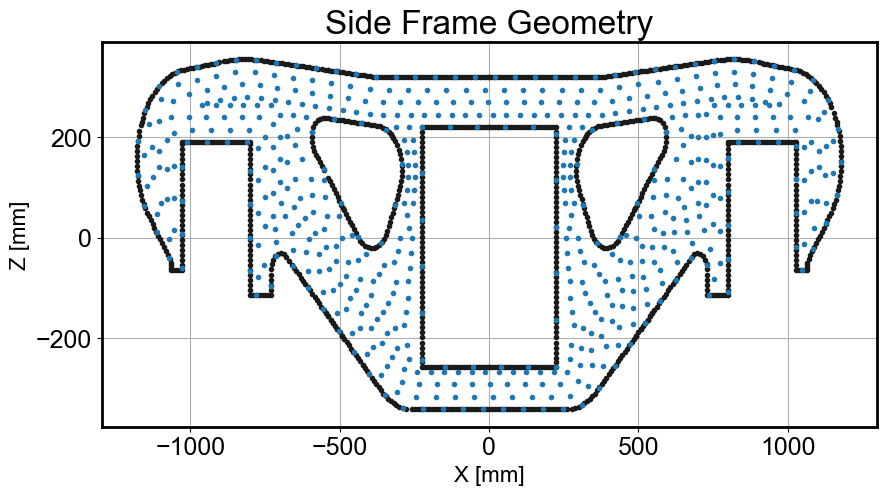

In [186]:
plt.figure(figsize=[10,5])
plt.title('Side Frame Geometry')
plt.plot(sd_X,sd_Y,'.k',sensor_X,sensor_Y,'.')
plt.xlabel("X [mm]", size = 16)
plt.ylabel("Z [mm]", size = 16)

Atenção! No simpack o eixo Z é negativo para cima, então toda vez que selecionarmos um sensor pela optimização, lembrar de multiplicar o eixo Z por -1, afim de achar o seu correspondente no simpack!!

In [187]:
df.drop(list(np.arange(0,251,1)),inplace=True) # Removing segment of track without irregularities
time = df['time']
df.drop('time', inplace=True, axis=1)

In [188]:
df = df +9.81

In [189]:
df.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
count,36316.000000,36316.000000,36316.00000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,...,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000
mean,0.002477,0.002422,0.00199,0.002476,0.002412,0.002382,0.002372,0.002402,0.002392,0.002386,...,0.002293,0.002471,0.002459,0.002483,0.002480,0.002446,0.002407,0.002393,0.002434,0.002422
std,1.003226,0.847111,1.02382,1.003226,0.822696,0.754264,0.733221,0.799066,0.776240,0.777915,...,0.609656,0.974662,0.940868,1.017457,1.002253,0.906892,0.806499,0.774241,0.873805,0.840350
min,-12.154600,-10.206400,-7.59950,-12.154600,-9.876800,-8.891000,-8.562400,-9.548000,-9.219500,-9.244100,...,-5.949400,-11.813500,-11.402500,-12.322700,-12.143100,-10.979800,-9.652600,-9.190200,-10.557000,-10.116100
25%,-0.532250,-0.453125,-0.54720,-0.532250,-0.438650,-0.405800,-0.394525,-0.427300,-0.415425,-0.416425,...,-0.331600,-0.517825,-0.501500,-0.540100,-0.531725,-0.484300,-0.430825,-0.414525,-0.468700,-0.448950
50%,-0.000445,-0.000645,0.00014,-0.000445,-0.000580,-0.000295,-0.000210,-0.000550,-0.000460,-0.000435,...,0.000115,-0.000460,-0.000580,-0.000435,-0.000440,-0.000680,-0.000585,-0.000460,-0.000560,-0.000630
75%,0.537860,0.457735,0.54608,0.537860,0.444303,0.410328,0.400182,0.432125,0.421368,0.422338,...,0.334453,0.522905,0.503825,0.544555,0.537383,0.487005,0.436560,0.420348,0.471635,0.453583
max,12.262800,11.061270,30.43010,12.262800,10.857970,10.249981,10.047346,10.655205,10.452615,10.467735,...,13.712870,12.052430,11.798960,12.366430,12.255690,11.538240,10.719697,10.434514,11.277520,11.005550


In [190]:
sensor

,x,y
0,1.103800,-0.172085
1,0.833650,-0.280464
2,-1.103800,-0.140427
3,1.103809,-0.140487
4,0.787935,-0.280076
...,...,...
595,0.940890,-0.294490
596,0.756852,-0.327875
597,0.692729,-0.322265
598,0.882271,-0.301687


In [191]:
sensor_name = df.columns

In [192]:
sensor['Sensor'] =df.columns.T

In [193]:
sensor_close = sensor[(sensor['Sensor'] == 'S563') | (sensor['Sensor'] == 'S538') | (sensor['Sensor'] == 'S589')
| (sensor['Sensor'] == 'S490') | (sensor['Sensor'] == 'S496') | (sensor['Sensor'] == 'S497') | (sensor['Sensor'] == 'S21') |
                      (sensor['Sensor'] == 'S24') | (sensor['Sensor'] == 'S23')]

In [194]:
sensor_far = sensor[(sensor['Sensor'] == 'S595') | (sensor['Sensor'] == 'S463') | (sensor['Sensor'] == 'S389') | (sensor['Sensor'] == 'S325')
| (sensor['Sensor'] == 'S189') | (sensor['Sensor'] == 'S68')| (sensor['Sensor'] == 'S288') | (sensor['Sensor'] == 'S492') | (sensor['Sensor'] == 'S181')]

In [195]:
sensor_close

,x,y,Sensor
20,-0.033692,-0.245,S21
22,0.057769,-0.245,S23
23,-0.079423,-0.245,S24
489,0.116201,-0.270,S490
495,-0.001918,-0.270,S496
496,-0.060977,-0.270,S497
537,-0.078493,-0.295,S538
562,0.050243,-0.295,S563
588,0.114611,-0.295,S589


In [196]:
sensor_far

,x,y,Sensor
67,-0.410652,0.133493,S68
180,-0.285698,-0.195000,S181
188,0.225000,0.071400,S189
287,0.596568,-0.116233,S288
324,-0.713073,-0.349140,S325
388,0.312235,0.333060,S389
462,-1.078800,-0.195220,S463
491,0.234319,-0.270000,S492
594,1.102170,-0.236638,S595


In [197]:
sensor_close_x = np.array(sensor_close['x'],dtype=float)*1000
sensor_close_y = np.array(sensor_close['y'],dtype=float)*1000*(-1)
sensor_far_x = np.array(sensor_far['x'],dtype=float)*1000
sensor_far_y = np.array(sensor_far['y'],dtype=float)*1000*(-1)

In [198]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 600
px.defaults.height = 400
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=sd_X, y=sd_Y,
                    mode='markers',name='Contorno da geometria'))
fig.add_trace(go.Scatter(x=sensor_far_x, y=sensor_far_y,
                    mode='markers',name='Sensores distantes'))
fig.add_trace(go.Scatter(x=sensor_close_x, y=sensor_close_y,
                    mode='markers',name='Sensores próximos'))
fig.show()

# EDA

In [199]:
def heat_map(data,method):
    sns.set(font_scale=1.4)
    corr=data.corr(method=method)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,cmap="coolwarm", linewidths=0.5, annot=True, annot_kws={"size":14},mask=mask,square=True,cbar=False)
    plt.show()    

In [200]:
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

In [201]:
acc_far = df[['S595','S463','S389','S325','S189','S68','S288','S492','S181']]

In [202]:
acc_close = df[['S563','S538','S589','S490','S496','S497','S21','S24','S23']]

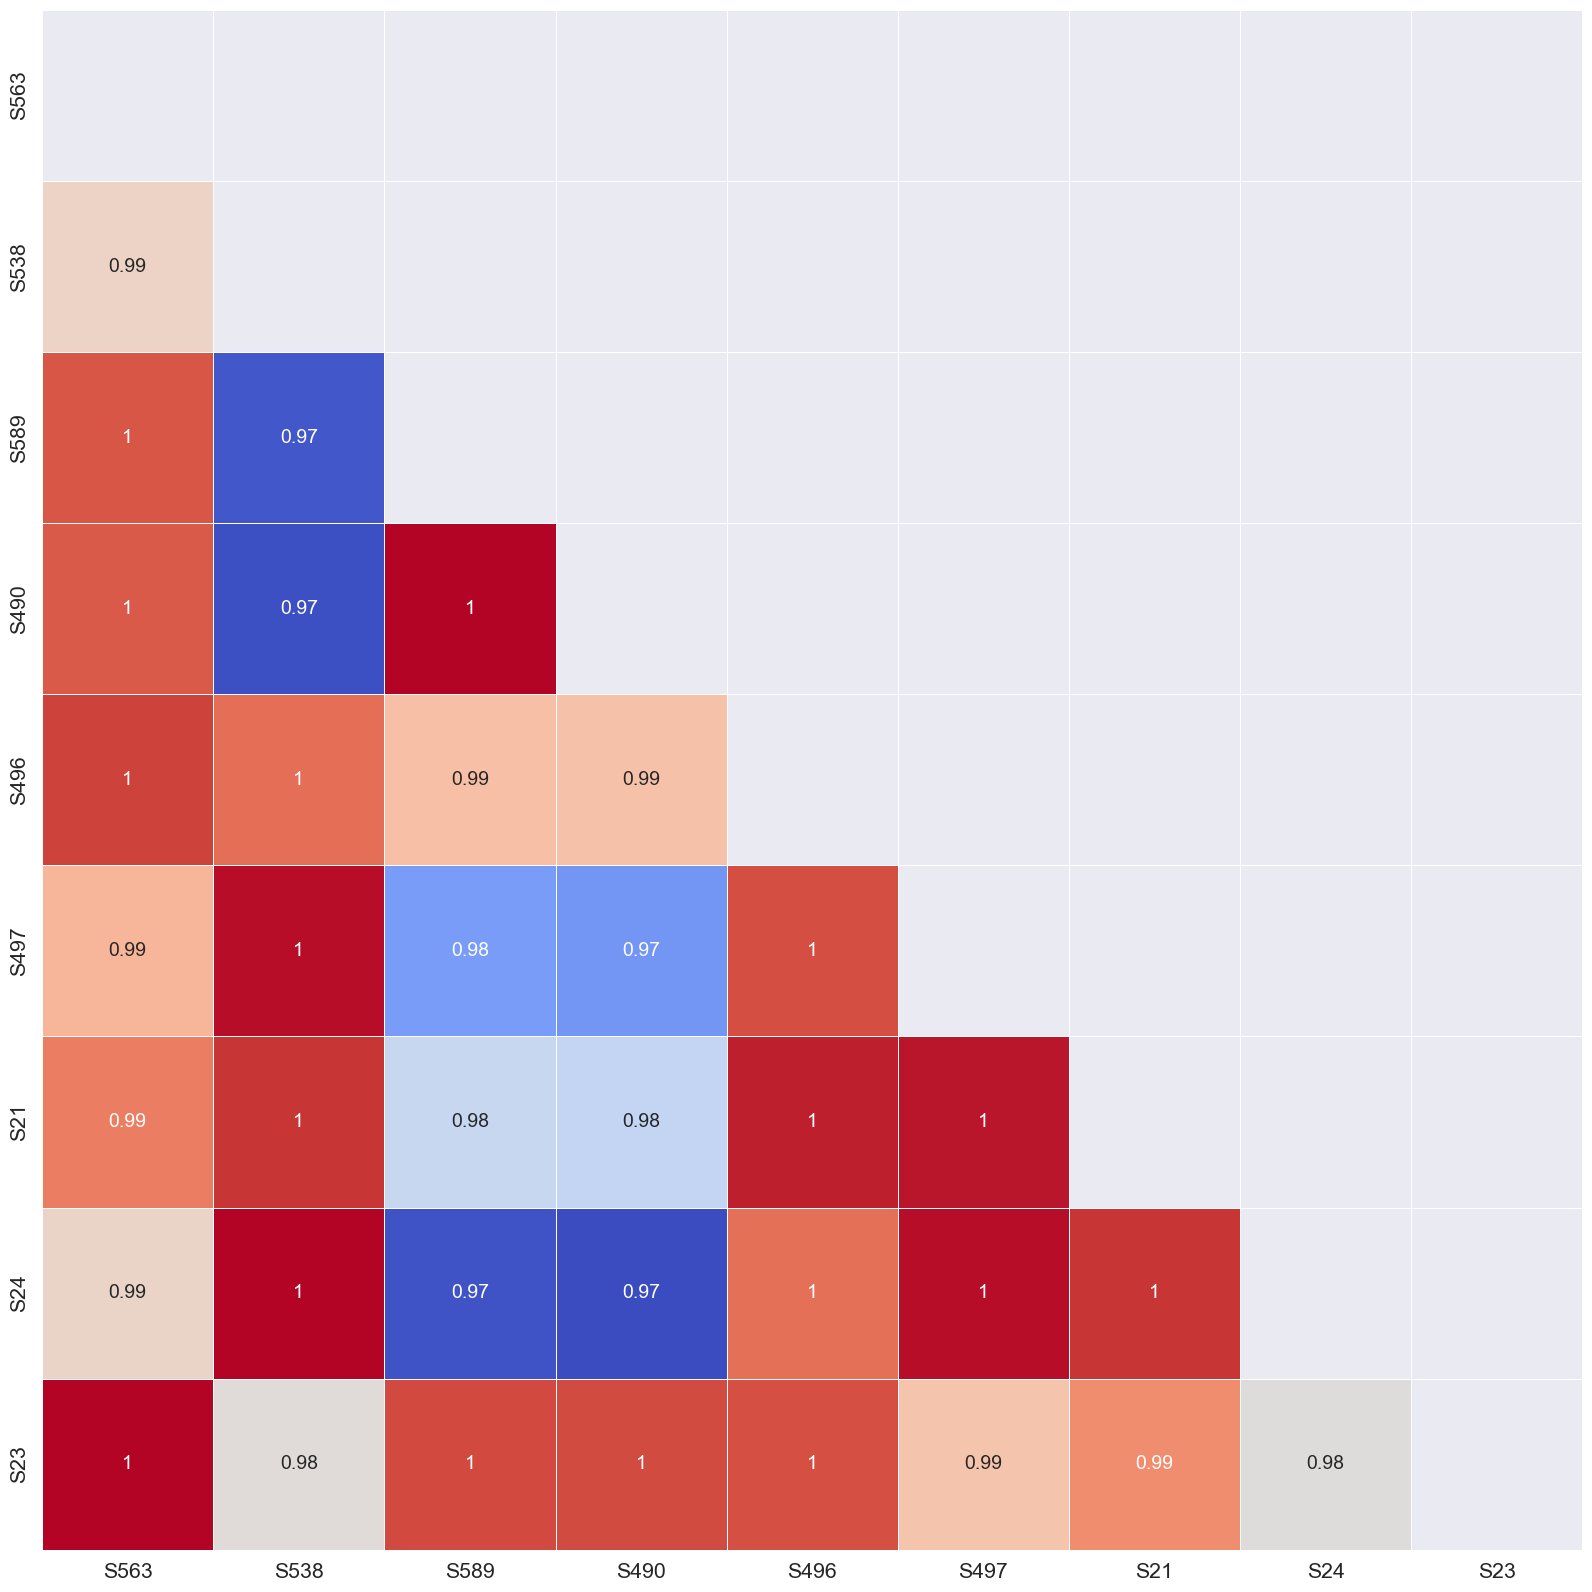

In [203]:
heat_map(acc_close, 'pearson')

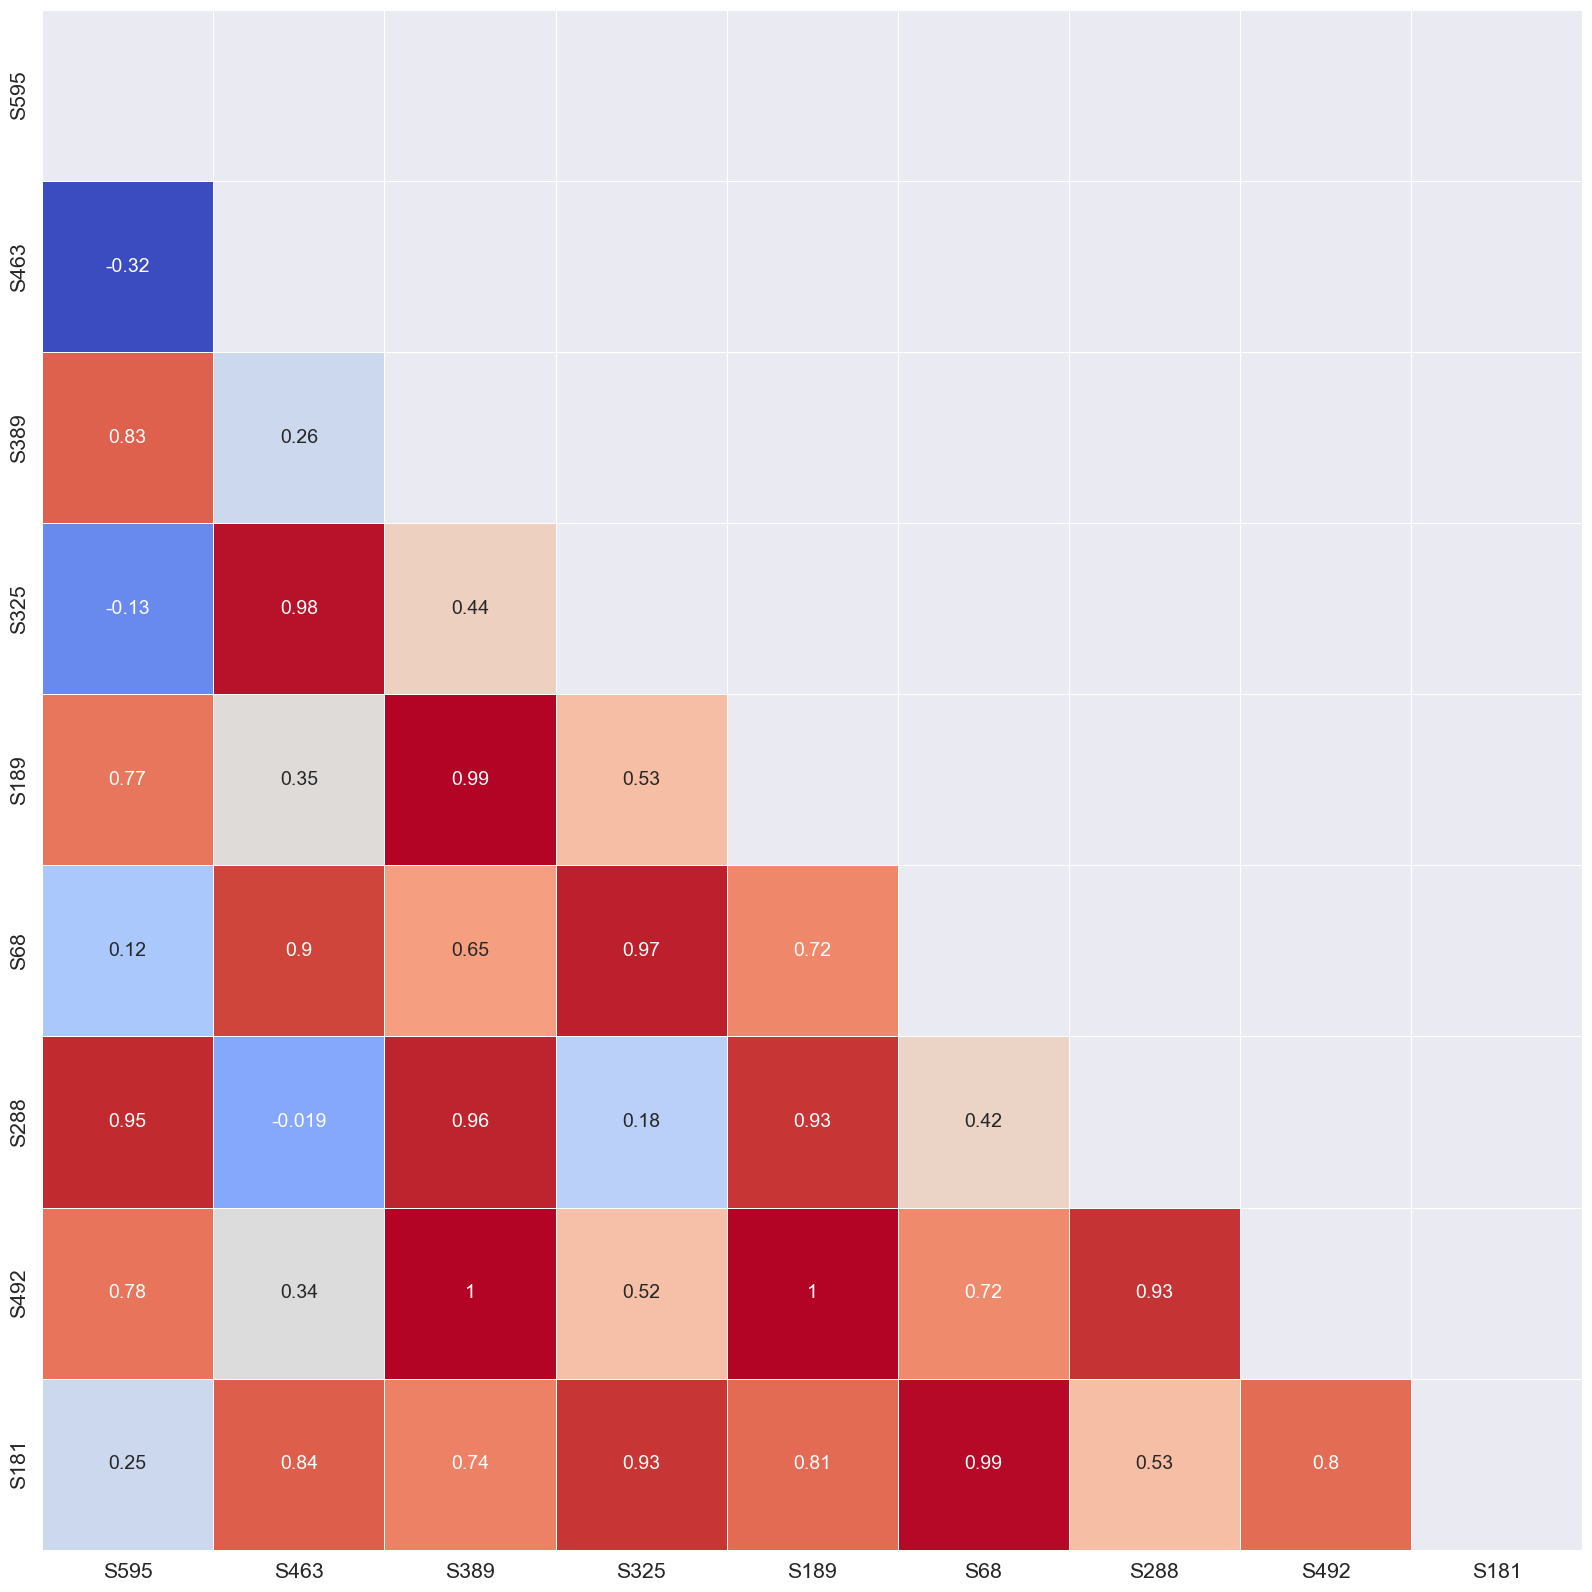

In [204]:
heat_map(acc_far, 'pearson')

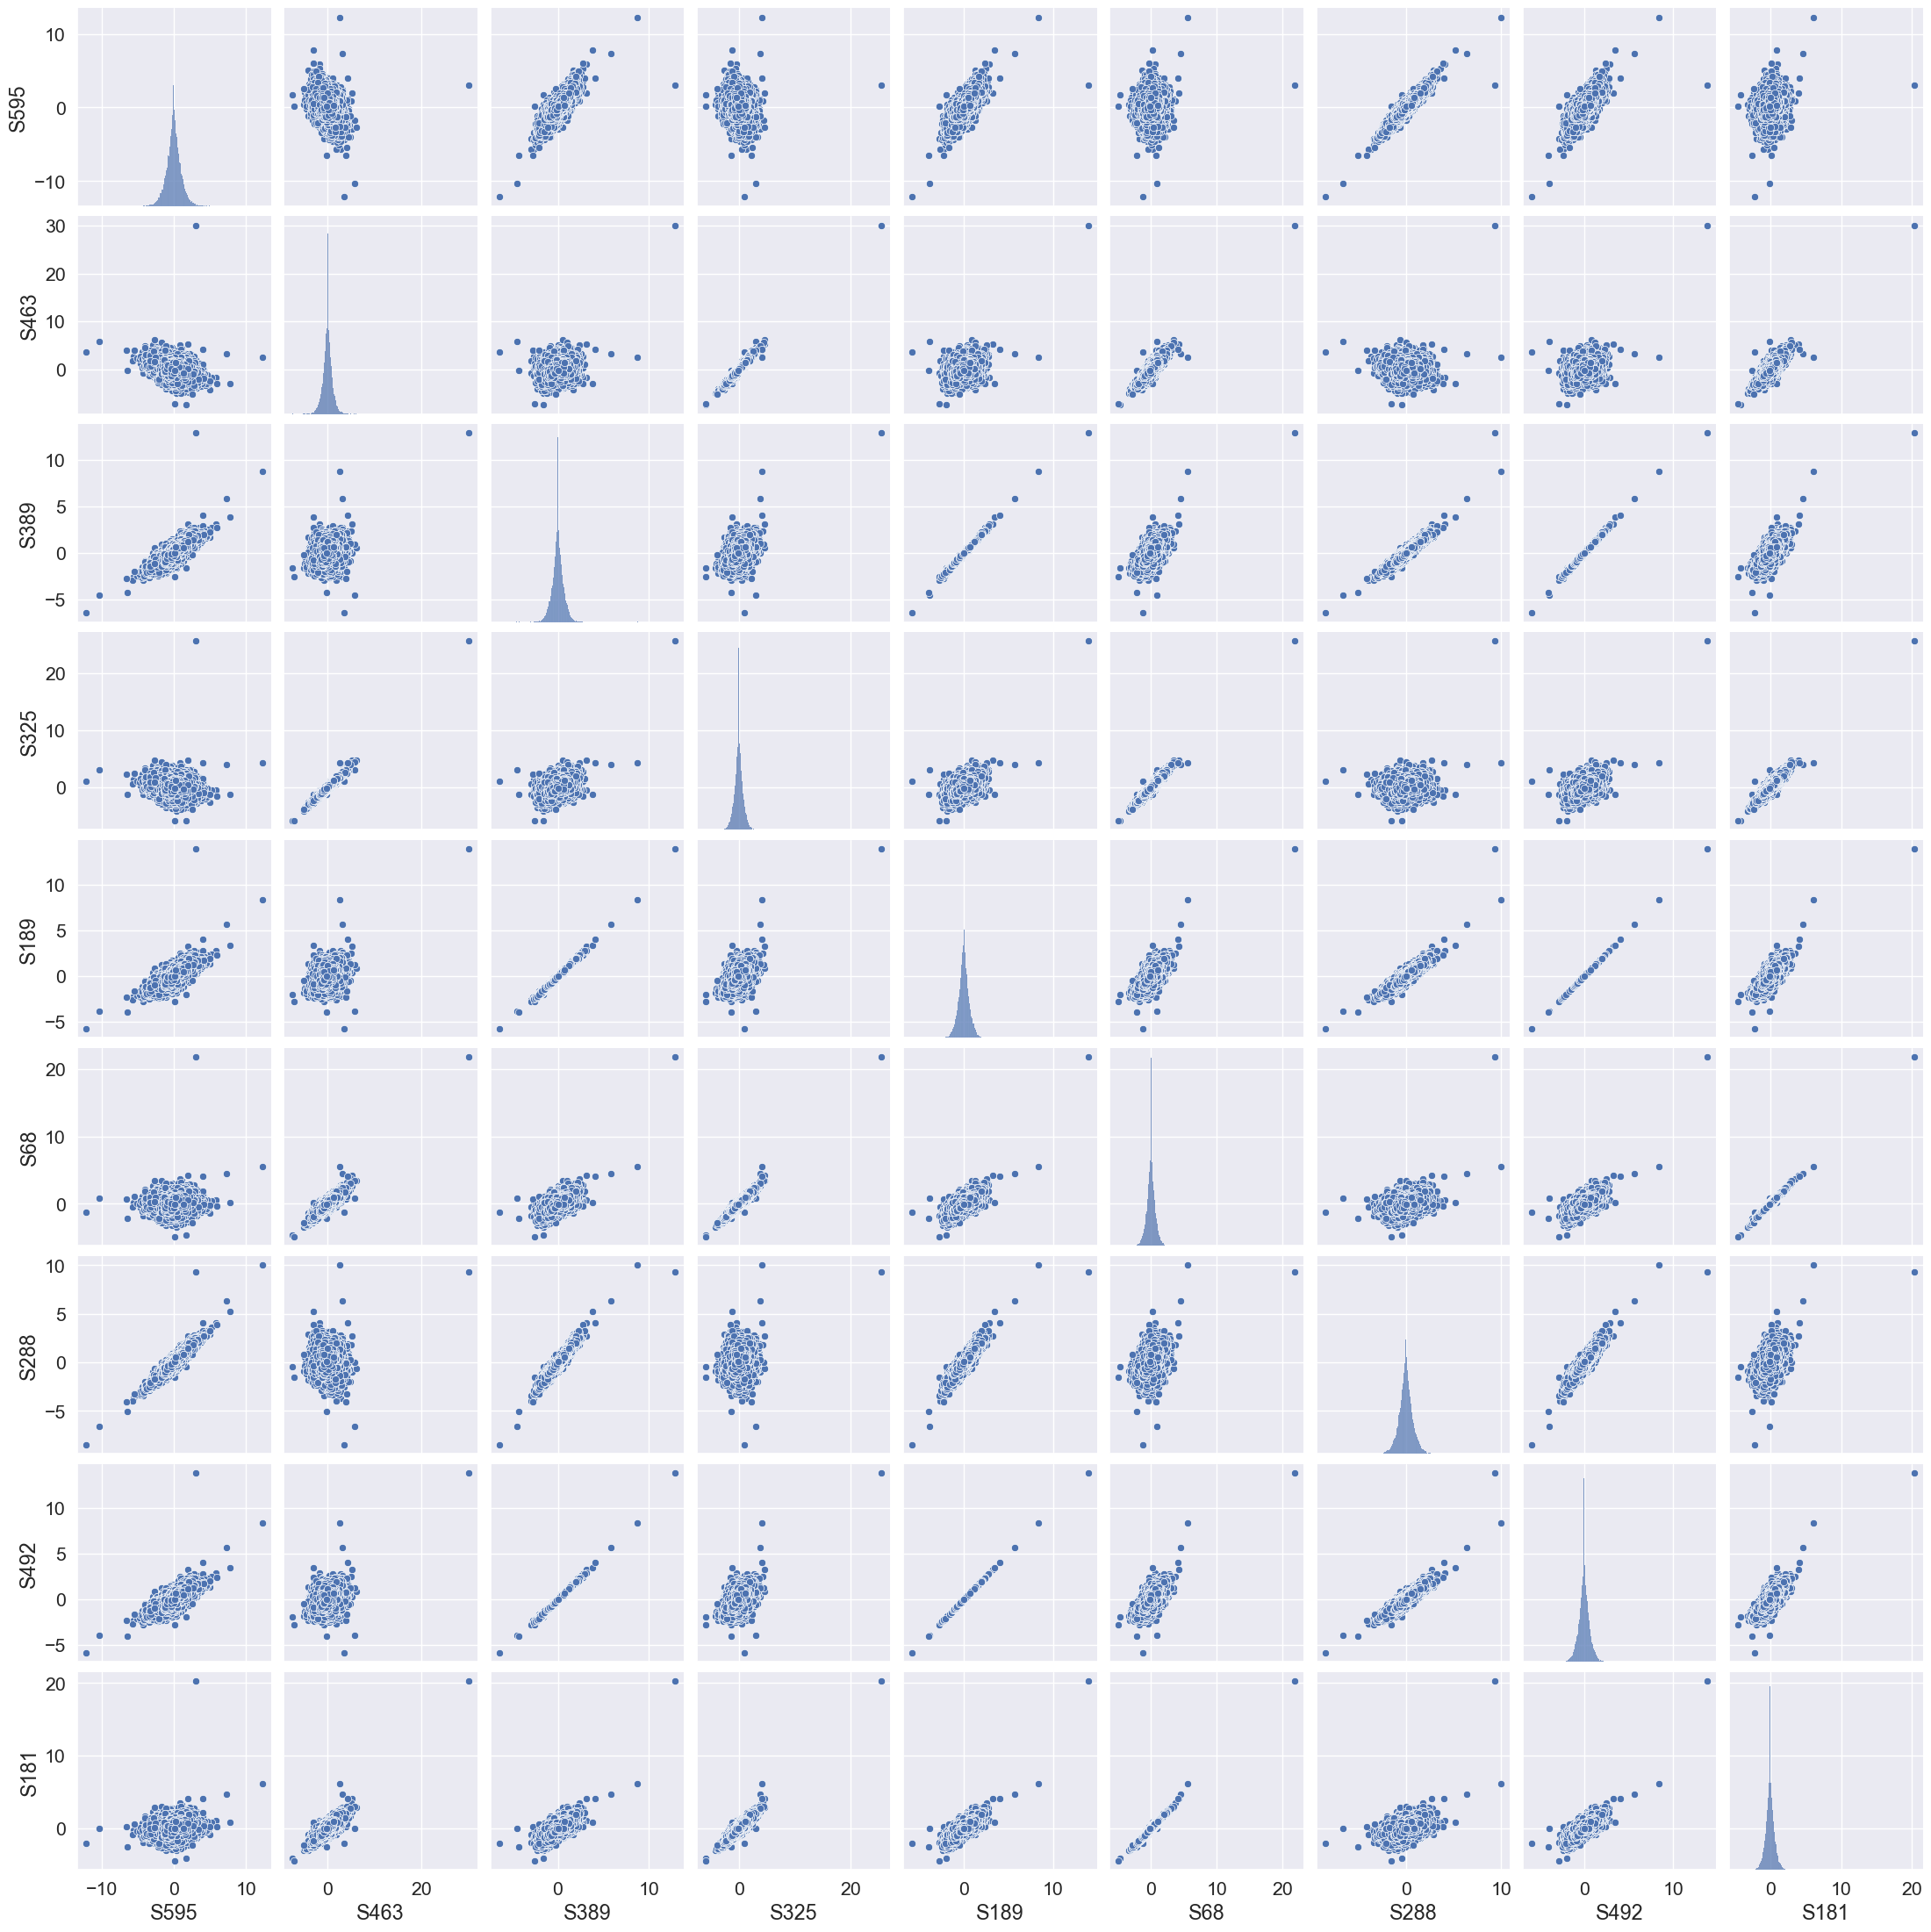

In [205]:
sns.pairplot(acc_far)

In [206]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 20,
    'axes.linewidth': 2,
    'axes.titlesize': 24,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'Arial',
    'legend.fontsize': 16,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})


# Line Plot

Como temos 600 sensores, vamos pegar uma amostra para analisar

In [207]:
acc_name = df[['S1','S7','S100','S120','S200','S340','S400','S510','S599']]

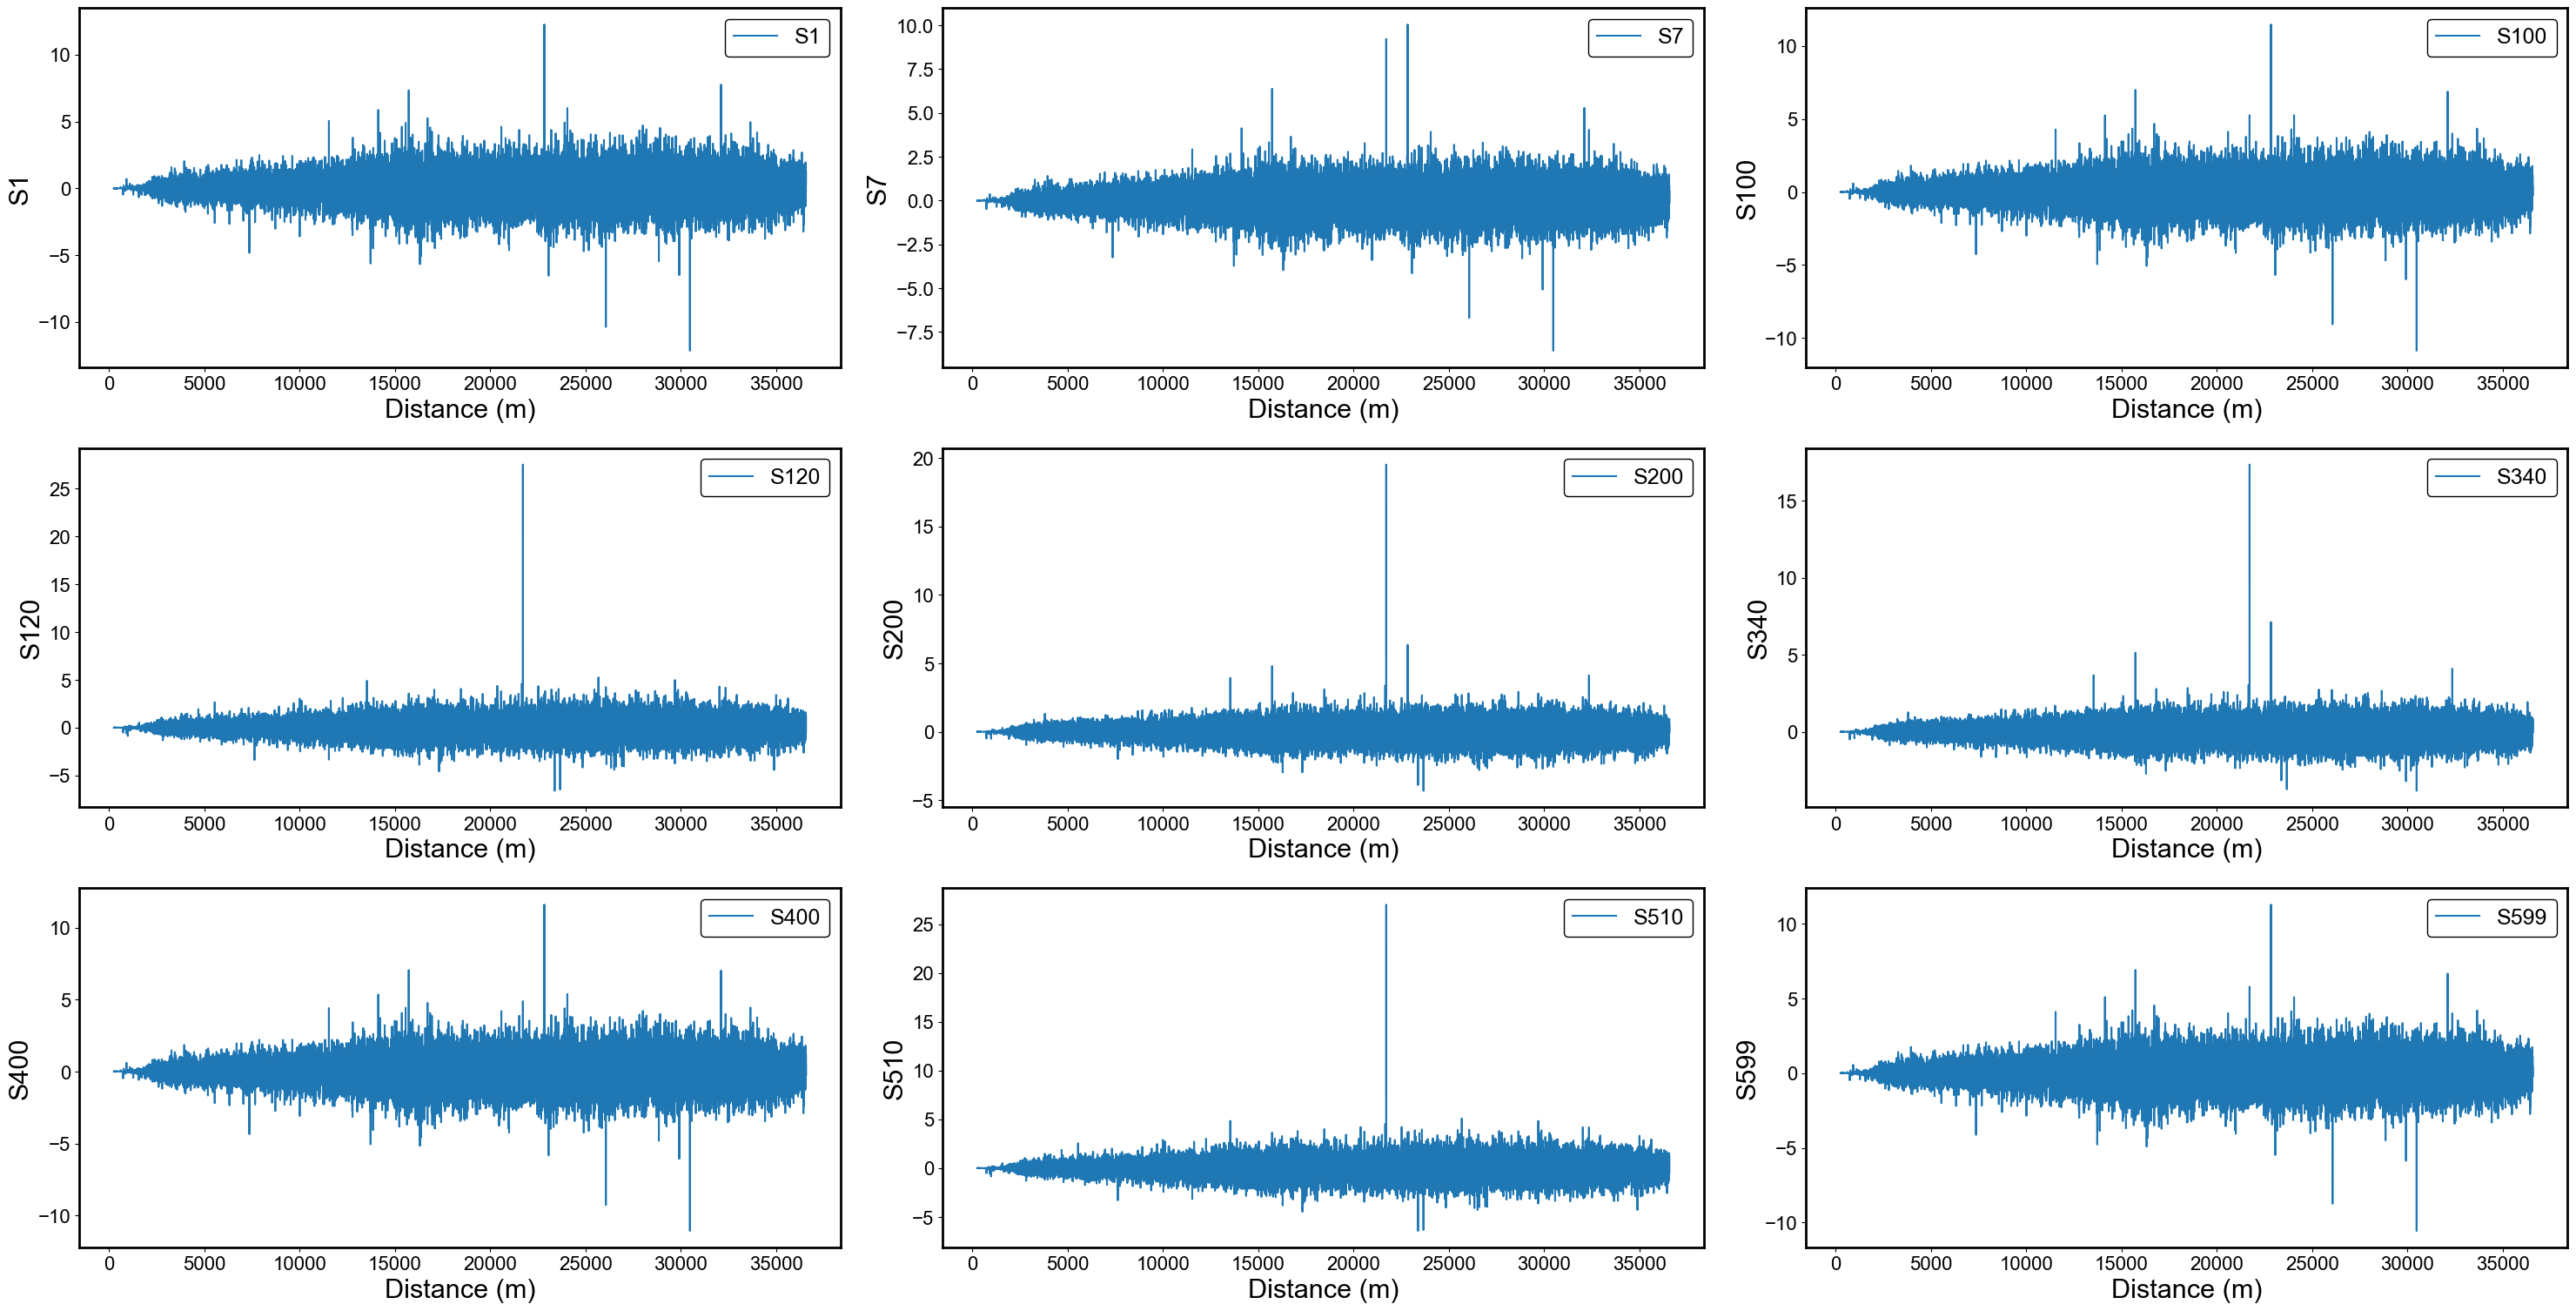

In [208]:
plt.rcParams.update({'figure.figsize': (30, 30)})

col = acc_name.columns

for i in range(len(col)):
    plt.subplot(6, 3, i+1)
    plt.plot(acc_name[acc_name.columns[i]], label = acc_name.columns[i])
    
    
    plt.xlabel('Distance (m)',fontsize=22)
    plt.ylabel(acc_name.columns[i],fontsize=22)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.tight_layout()
    plt.legend(fontsize=18)
    plt.grid()

Com base nessa amostra temos alguns outliers, vamos plor um boxplot

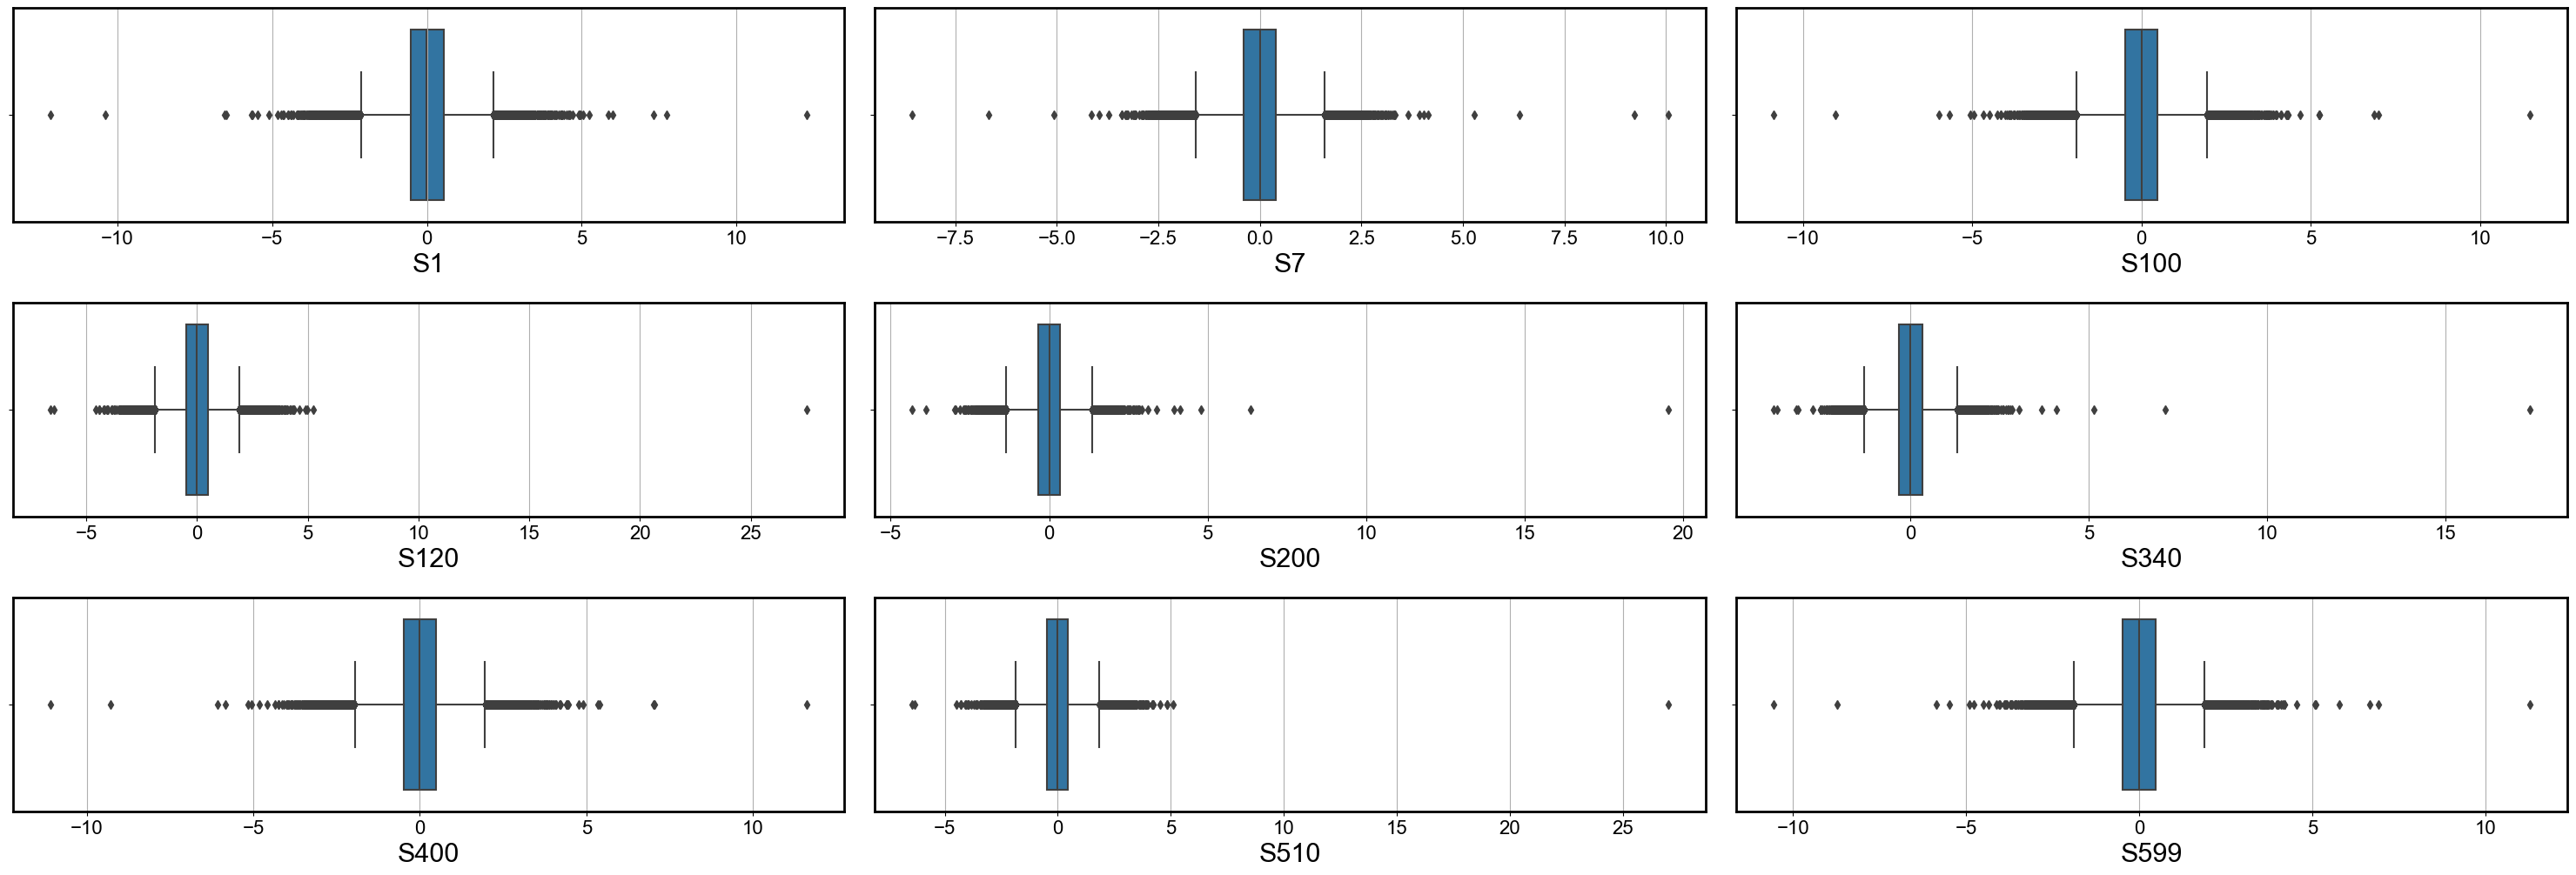

In [209]:
plt.rcParams.update({'figure.figsize': (30, 20)})

col = acc_name.columns

for i in range(len(col)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(data=acc_name, x=acc_name.columns[i])
    
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.xlabel(acc_name.columns[i],fontsize=22)
    plt.tight_layout()

## Outlier removal

In [210]:
def outlier_2nan(df, x, factor=1.5):
    fator = factor
    q3, q1 = np.percentile(df[x], [75, 25])
    iqr = q3 - q1
    lowpass = q1 - (iqr*fator)
    highpass = q3 + (iqr*fator)
    df[x].loc[(df[x] < lowpass) | (df[x] > highpass)] = np.nan

In [211]:
# Remover outliers
for c in acc_name.columns:
    outlier_2nan(acc_name, c, factor=3.5)
acc_name.dropna(inplace=True)

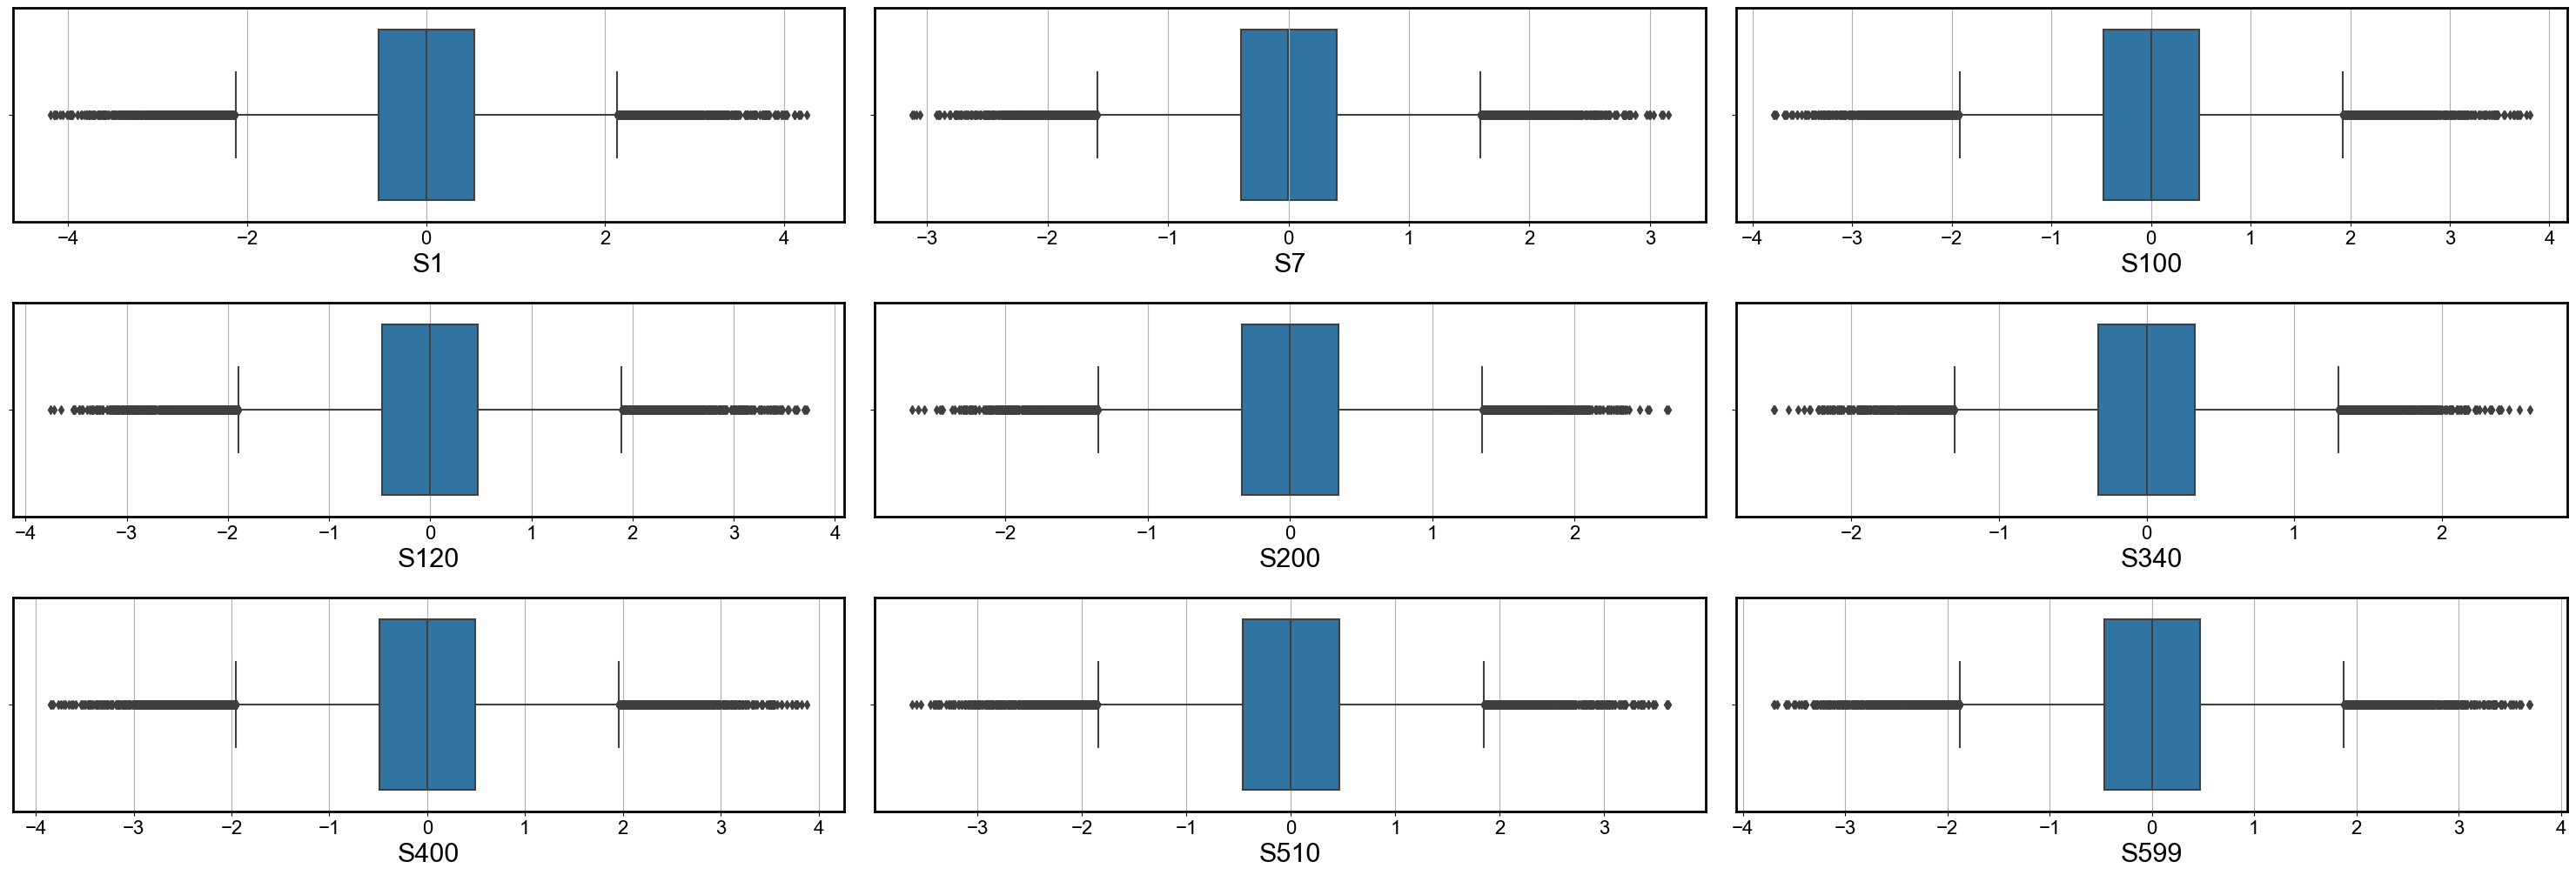

In [212]:
plt.rcParams.update({'figure.figsize': (30, 20)})

col = acc_name.columns

for i in range(len(col)):
    plt.subplot(6, 3, i+1)
    sns.boxplot(data=acc_name, x=acc_name.columns[i])
    
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.xlabel(acc_name.columns[i],fontsize=22)
    plt.tight_layout()

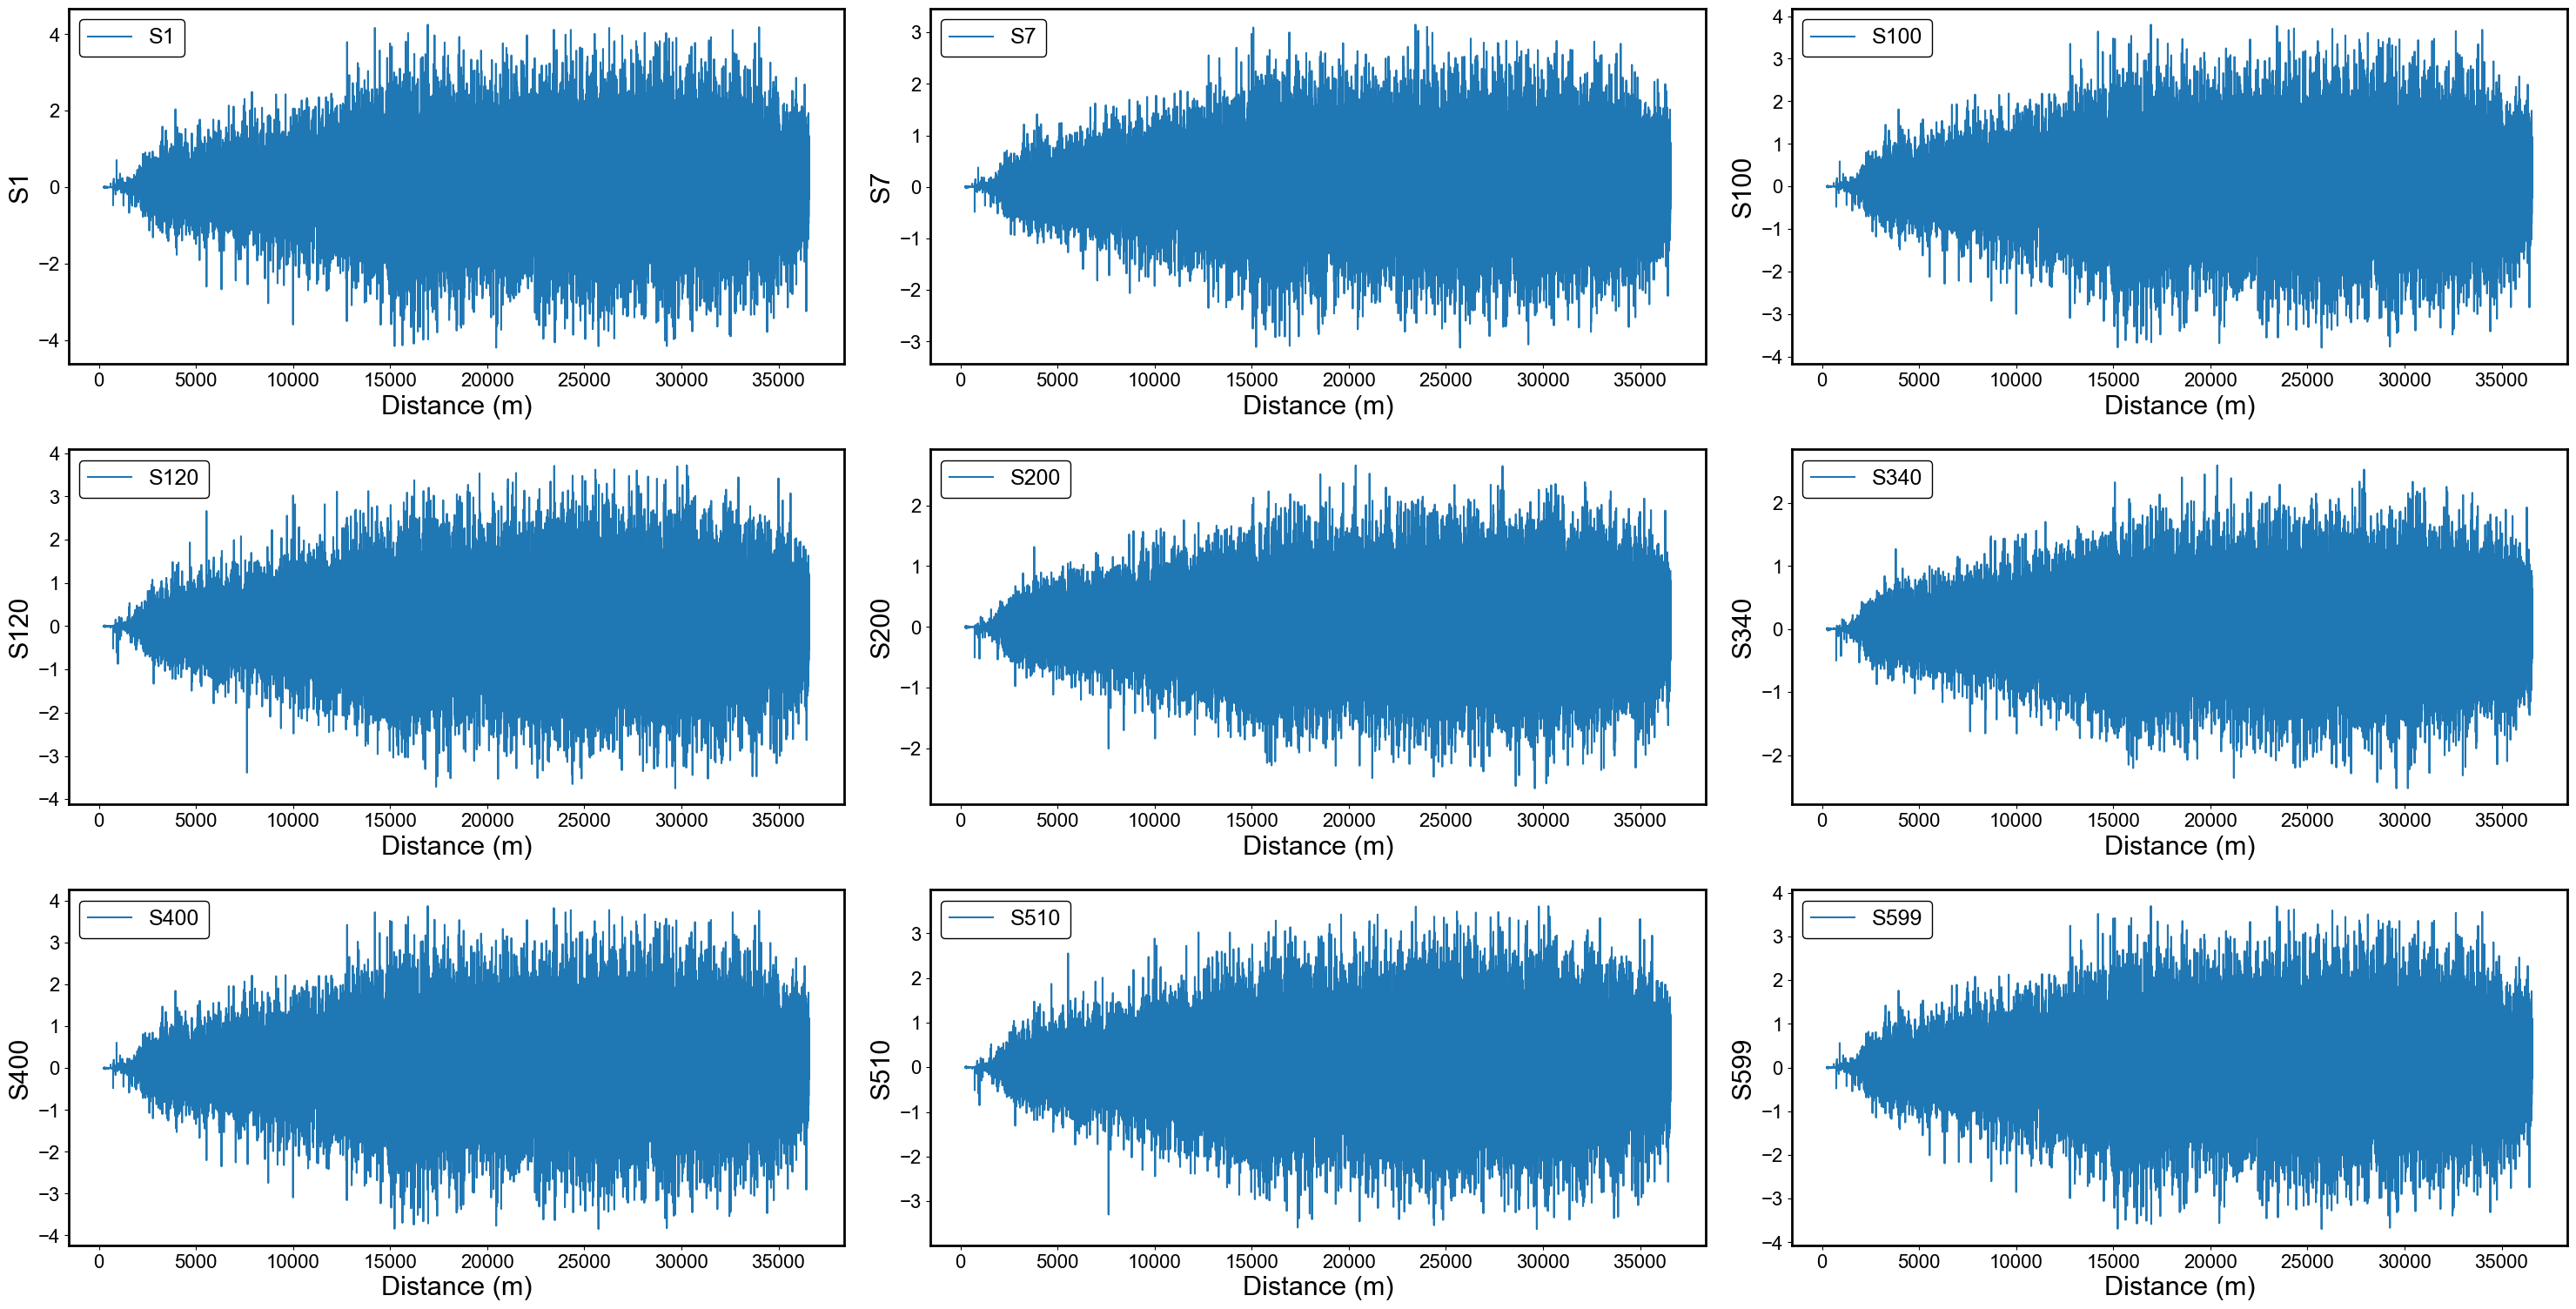

In [213]:
plt.rcParams.update({'figure.figsize': (30, 30)})

col = acc_name.columns

for i in range(len(col)):
    plt.subplot(6, 3, i+1)
    plt.plot(acc_name[acc_name.columns[i]], label = acc_name.columns[i])
    
    
    plt.xlabel('Distance (m)',fontsize=22)
    plt.ylabel(acc_name.columns[i],fontsize=22)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=16)
    plt.tick_params(axis='y', which='major', labelsize=16)
    plt.tight_layout()
    plt.legend(fontsize=18)
    plt.grid()

In [214]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
251,-0.00094,-0.00093,-0.00091,-0.00094,-0.00093,-0.00093,-0.00093,-0.00093,-0.00093,-0.00093,...,-0.00093,-0.00094,-0.00094,-0.00094,-0.00094,-0.00094,-0.00093,-0.00093,-0.00093,-0.00093
252,0.00168,0.00170,0.00191,0.00168,0.00171,0.00172,0.00173,0.00171,0.00172,0.00172,...,0.00177,0.00168,0.00169,0.00167,0.00168,0.00169,0.00171,0.00172,0.00170,0.00170
253,0.00627,0.00633,0.00672,0.00627,0.00633,0.00636,0.00637,0.00634,0.00635,0.00635,...,0.00645,0.00628,0.00629,0.00627,0.00627,0.00630,0.00634,0.00635,0.00632,0.00633
254,0.00837,0.00841,0.00869,0.00837,0.00842,0.00844,0.00845,0.00843,0.00843,0.00843,...,0.00850,0.00838,0.00839,0.00837,0.00838,0.00840,0.00842,0.00843,0.00841,0.00842
255,0.00136,0.00127,0.00060,0.00136,0.00125,0.00120,0.00119,0.00124,0.00122,0.00122,...,0.00106,0.00134,0.00132,0.00137,0.00136,0.00130,0.00124,0.00122,0.00128,0.00126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36562,0.70700,0.67140,0.41603,0.70699,0.66538,0.64736,0.64135,0.65937,0.65336,0.65379,...,0.59360,0.70077,0.69326,0.71007,0.70679,0.68554,0.66128,0.65283,0.67781,0.66976
36563,1.33929,1.08147,-0.76770,1.33929,1.03784,0.90737,0.86388,0.99433,0.95085,0.95407,...,0.51806,1.29417,1.23977,1.36153,1.33778,1.18383,1.00818,0.94698,1.12788,1.06952
36564,-0.30420,-0.24760,0.15815,-0.30420,-0.23810,-0.20940,-0.19990,-0.22850,-0.21900,-0.21970,...,-0.12399,-0.29430,-0.28240,-0.30910,-0.30390,-0.27010,-0.23150,-0.21810,-0.25780,-0.24500
36565,0.16480,0.11362,-0.25350,0.16480,0.10496,0.07906,0.07042,0.09632,0.08769,0.08832,...,0.00177,0.15585,0.14505,0.16922,0.16450,0.13394,0.09907,0.08692,0.12284,0.11125


Ajustado o fator c para remoção dos outliers na amostra, aplica-se a função de remoção no dataset inteiro

In [215]:
df.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
count,36316.000000,36316.000000,36316.00000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,...,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000,36316.000000
mean,0.002477,0.002422,0.00199,0.002476,0.002412,0.002382,0.002372,0.002402,0.002392,0.002386,...,0.002293,0.002471,0.002459,0.002483,0.002480,0.002446,0.002407,0.002393,0.002434,0.002422
std,1.003226,0.847111,1.02382,1.003226,0.822696,0.754264,0.733221,0.799066,0.776240,0.777915,...,0.609656,0.974662,0.940868,1.017457,1.002253,0.906892,0.806499,0.774241,0.873805,0.840350
min,-12.154600,-10.206400,-7.59950,-12.154600,-9.876800,-8.891000,-8.562400,-9.548000,-9.219500,-9.244100,...,-5.949400,-11.813500,-11.402500,-12.322700,-12.143100,-10.979800,-9.652600,-9.190200,-10.557000,-10.116100
25%,-0.532250,-0.453125,-0.54720,-0.532250,-0.438650,-0.405800,-0.394525,-0.427300,-0.415425,-0.416425,...,-0.331600,-0.517825,-0.501500,-0.540100,-0.531725,-0.484300,-0.430825,-0.414525,-0.468700,-0.448950
50%,-0.000445,-0.000645,0.00014,-0.000445,-0.000580,-0.000295,-0.000210,-0.000550,-0.000460,-0.000435,...,0.000115,-0.000460,-0.000580,-0.000435,-0.000440,-0.000680,-0.000585,-0.000460,-0.000560,-0.000630
75%,0.537860,0.457735,0.54608,0.537860,0.444303,0.410328,0.400182,0.432125,0.421368,0.422338,...,0.334453,0.522905,0.503825,0.544555,0.537383,0.487005,0.436560,0.420348,0.471635,0.453583
max,12.262800,11.061270,30.43010,12.262800,10.857970,10.249981,10.047346,10.655205,10.452615,10.467735,...,13.712870,12.052430,11.798960,12.366430,12.255690,11.538240,10.719697,10.434514,11.277520,11.005550


In [216]:
# Remover outliers do conjun df
for c in df.columns:
    outlier_2nan(df, c, factor=3.5)
df.dropna(inplace=True)

In [217]:
df.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
count,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,...,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000,36236.000000
mean,0.001500,0.001351,0.000248,0.001499,0.001325,0.001248,0.001222,0.001299,0.001273,0.001269,...,0.001017,0.001477,0.001446,0.001514,0.001502,0.001413,0.001310,0.001273,0.001380,0.001346
std,0.982961,0.829833,0.996133,0.982961,0.805853,0.738561,0.717838,0.782630,0.760186,0.761833,...,0.595433,0.954964,0.921831,0.996907,0.982007,0.888507,0.789937,0.758219,0.856039,0.823193
min,-4.196100,-3.595600,-4.281500,-4.196100,-3.500400,-3.215600,-3.120700,-3.405400,-3.310500,-3.317600,...,-2.560500,-4.060000,-3.941100,-4.263100,-4.191400,-3.818900,-3.435600,-3.302000,-3.696800,-3.569500
25%,-0.531425,-0.452175,-0.546300,-0.531425,-0.437800,-0.405400,-0.394200,-0.426825,-0.414925,-0.415925,...,-0.330900,-0.516800,-0.501000,-0.539425,-0.531100,-0.483725,-0.430500,-0.414200,-0.467950,-0.448200
50%,-0.000475,-0.000690,0.000085,-0.000475,-0.000630,-0.000315,-0.000230,-0.000580,-0.000480,-0.000470,...,0.000080,-0.000495,-0.000630,-0.000470,-0.000470,-0.000735,-0.000640,-0.000475,-0.000615,-0.000695
75%,0.535080,0.455415,0.544383,0.535080,0.442593,0.408240,0.398920,0.430645,0.419755,0.420463,...,0.333153,0.521063,0.502138,0.542373,0.534407,0.485628,0.434985,0.419163,0.469810,0.452100
max,4.250480,3.592510,4.339970,4.250480,3.503490,3.237290,3.148570,3.414710,3.326010,3.332630,...,2.622370,4.131550,3.988240,4.309070,4.246460,3.840840,3.442950,3.318090,3.693440,3.568110


In [218]:
df_acc = np.array(df,dtype=float)

In [219]:
df_acc[0,:] #aceleração no primeiro instante de tempo

array([-0.00094, -0.00093, -0.00091, -0.00094, -0.00093, -0.00093,
       -0.00093, -0.00093, -0.00093, -0.00093, -0.00093, -0.00093,
       -0.00093, -0.00093, -0.00093, -0.00091, -0.00093, -0.00093,
       -0.00093, -0.00092, -0.00092, -0.00092, -0.00092, -0.00092,
       -0.00092, -0.00092, -0.00092, -0.00092, -0.00093, -0.00093,
       -0.00093, -0.00093, -0.00093, -0.00093, -0.00092, -0.00093,
       -0.00093, -0.00093, -0.00091, -0.00091, -0.00091, -0.00091,
       -0.00091, -0.00091, -0.00092, -0.00091, -0.00091, -0.00092,
       -0.00092, -0.00092, -0.00092, -0.00092, -0.00092, -0.00091,
       -0.00092, -0.00092, -0.00092, -0.00093, -0.00093, -0.00093,
       -0.00093, -0.00093, -0.00093, -0.00093, -0.00093, -0.00093,
       -0.00092, -0.00092, -0.00092, -0.00092, -0.00092, -0.00092,
       -0.00093, -0.00092, -0.00092, -0.00093, -0.00093, -0.00093,
       -0.00093, -0.00093, -0.00093, -0.00093, -0.00093, -0.00093,
       -0.00092, -0.00092, -0.00092, -0.00092, -0.00092, -0.00

In [220]:
sensor

,x,y,Sensor
0,1.103800,-0.172085,S1
1,0.833650,-0.280464,S2
2,-1.103800,-0.140427,S3
3,1.103809,-0.140487,S4
4,0.787935,-0.280076,S5
...,...,...,...
595,0.940890,-0.294490,S596
596,0.756852,-0.327875,S597
597,0.692729,-0.322265,S598
598,0.882271,-0.301687,S599


In [221]:
sensor.drop('Sensor', inplace=True, axis=1)

In [222]:
coordinates = np.array(sensor,dtype=float)

In [223]:
coordinates

array([[ 1.1038   , -0.1720848],
       [ 0.8336495, -0.2804641],
       [-1.1038   , -0.1404266],
       ...,
       [ 0.6927295, -0.3222648],
       [ 0.8822711, -0.3016873],
       [ 0.8211246, -0.3307568]])

In [224]:
y = coordinates[:,1]*(-1)
x = coordinates[:,0]

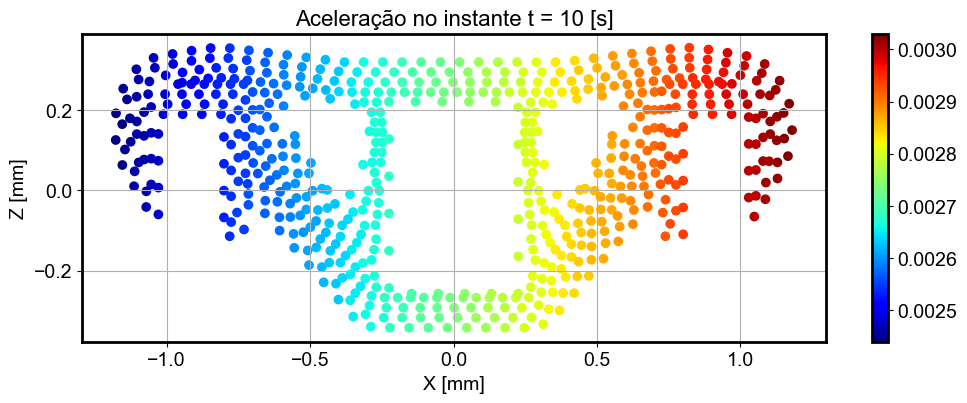

In [225]:
plt.figure(figsize=[12,4])
plt.scatter(x, y, c=df_acc[10,:], cmap='jet')
plt.title('Aceleração no instante t = 10 [s]',size=16)
plt.xlabel("X [mm]", size = 14)
plt.ylabel("Z [mm]", size = 14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
font_size = 14 # Adjust as appropriate.
cb = plt.colorbar()
cb.ax.tick_params(labelsize=font_size)
plt.show()

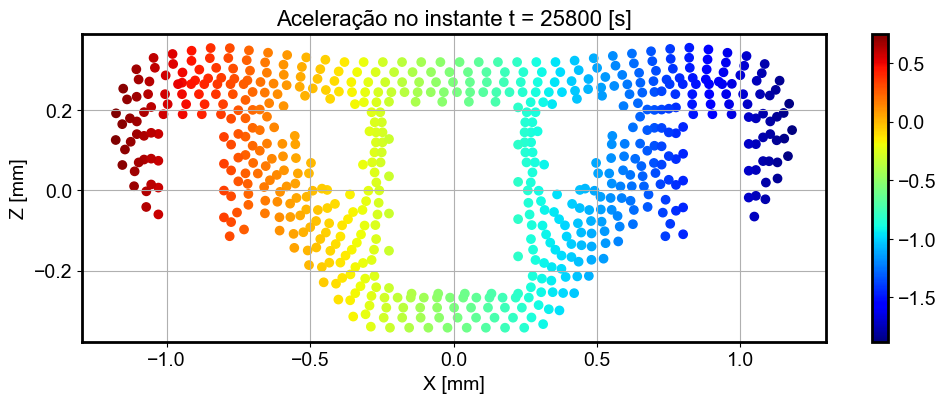

In [226]:
plt.figure(figsize=[12,4])
plt.scatter(x, y, c=df_acc[25800,:], cmap='jet')
plt.title('Aceleração no instante t = 25800 [s]',size=16)
plt.xlabel("X [mm]", size = 14)
plt.ylabel("Z [mm]", size = 14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
font_size = 14 # Adjust as appropriate.
cb = plt.colorbar()
cb.ax.tick_params(labelsize=font_size)
plt.show()

In [227]:
data_svd = df.T

In [228]:
data_svd

,251,252,253,254,255,256,257,258,259,260,...,36557,36558,36559,36560,36561,36562,36563,36564,36565,36566
S1,-0.00094,0.00168,0.00627,0.00837,0.00136,-0.00425,-0.00728,-0.00625,-0.00281,0.00057,...,0.28809,-0.11385,-0.14938,0.23838,-0.32480,0.70700,1.33929,-0.30420,0.16480,0.30755
S2,-0.00093,0.00170,0.00633,0.00841,0.00127,-0.00434,-0.00725,-0.00619,-0.00279,0.00054,...,0.27739,0.06462,-0.09299,0.17210,-0.21650,0.67140,1.08147,-0.24760,0.11362,0.43157
S3,-0.00091,0.00191,0.00672,0.00869,0.00060,-0.00500,-0.00698,-0.00583,-0.00264,0.00030,...,0.20056,1.34447,0.31139,-0.30340,0.55966,0.41603,-0.76770,0.15815,-0.25350,1.32097
S4,-0.00094,0.00168,0.00627,0.00837,0.00136,-0.00425,-0.00728,-0.00625,-0.00281,0.00057,...,0.28809,-0.11385,-0.14939,0.23837,-0.32480,0.70699,1.33929,-0.30420,0.16480,0.30755
S5,-0.00093,0.00171,0.00633,0.00842,0.00125,-0.00436,-0.00724,-0.00619,-0.00279,0.00053,...,0.27558,0.09481,-0.08345,0.16088,-0.19820,0.66538,1.03784,-0.23810,0.10496,0.45255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S596,-0.00094,0.00169,0.00630,0.00840,0.00130,-0.00431,-0.00726,-0.00621,-0.00280,0.00055,...,0.28164,-0.00623,-0.11537,0.19842,-0.25950,0.68554,1.18383,-0.27010,0.13394,0.38234
S597,-0.00093,0.00171,0.00634,0.00842,0.00124,-0.00437,-0.00724,-0.00618,-0.00279,0.00053,...,0.27435,0.11535,-0.07695,0.15326,-0.18574,0.66128,1.00818,-0.23150,0.09907,0.46683
S598,-0.00093,0.00172,0.00635,0.00843,0.00122,-0.00439,-0.00723,-0.00617,-0.00278,0.00052,...,0.27181,0.15771,-0.06357,0.13752,-0.16005,0.65283,0.94698,-0.21810,0.08692,0.49626
S599,-0.00093,0.00170,0.00632,0.00841,0.00128,-0.00433,-0.00725,-0.00620,-0.00280,0.00054,...,0.27932,0.03250,-0.10313,0.18403,-0.23600,0.67781,1.12788,-0.25780,0.12284,0.40925


In [229]:
data_svd= np.array(data_svd,dtype=float)

In [230]:
df.shape[0]*0.5

18118.0

In [231]:
df.shape

(36236, 600)

In [232]:
X_train = data_svd[:,:30000]

In [233]:
X_test = data_svd[:,30000:]

In [234]:
X_train.shape

(600, 30000)

In [235]:
X_test.shape

(600, 6236)

In [236]:
meansst =np.mean(X_train, axis=1)
varsst = (np.var(X_train,axis=1))**(0.5)
X_train = X_train - np.tile(meansst,(X_train.shape[1],1)).T
X_train = X_train/(np.tile(varsst,(X_train.shape[1],1)).T)

In [237]:
meansst =np.mean(X_train, axis=1)
varsst = (np.var(X_train,axis=1))**(0.5)
X_test = X_test - np.tile(meansst,(X_test.shape[1],1)).T
X_test = X_test/(np.tile(varsst,(X_test.shape[1],1)).T)

In [238]:
(np.tile(varsst,(X_train.shape[1],1)).T).shape

(600, 30000)

# SVD

In [239]:
from scipy.linalg import svd
U,S,V_T = svd(X_train, full_matrices=False)

In [240]:
D = np.diag(S)

In [241]:
D.shape

(600, 600)

In [242]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 20,
    'axes.linewidth': 2,
    'axes.titlesize': 24,
    'axes.edgecolor': 'black',
    'axes.labelsize': 20,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'Arial',
    'legend.fontsize': 16,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})


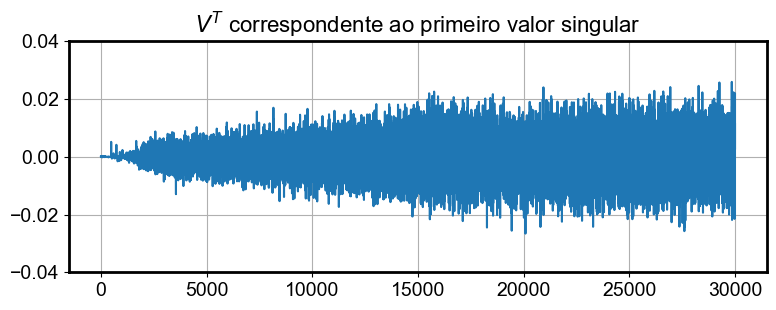

In [243]:
plt.figure(figsize=[9,3])
plt.plot(V_T[0,:])
plt.title('$V^T$ correspondente ao primeiro valor singular',size=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim([-0.04,0.04])
plt.show()

#a matriz VT é normalizada, a variância está na matriz  U

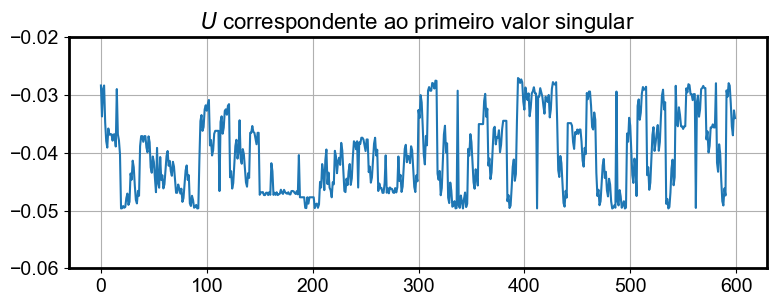

In [244]:
plt.figure(figsize=[9,3])
plt.plot(U[:,0])
plt.title('$U$ correspondente ao primeiro valor singular',size=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim([-0.06,-0.02])
plt.show()


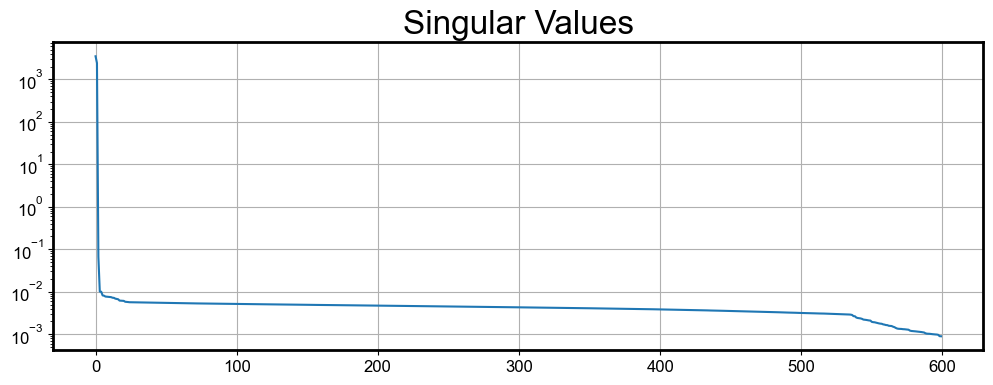

<Figure size 1500x600 with 0 Axes>

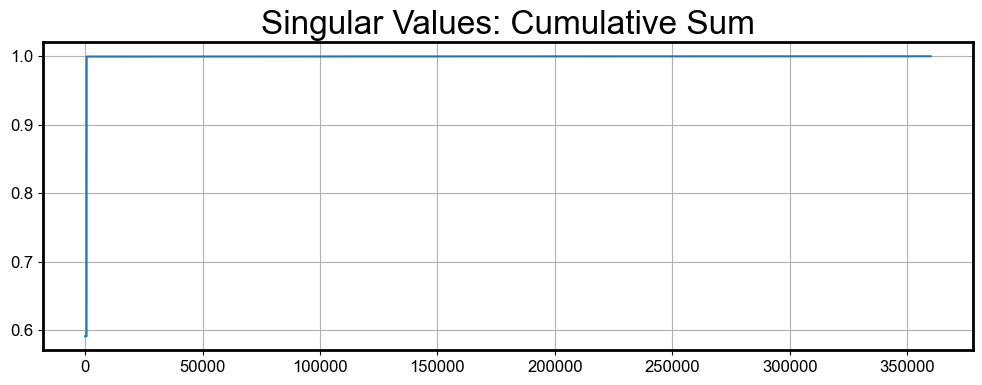

In [245]:
plt.figure(figsize=[12,4])
plt.figure(1)
plt.semilogy(S)
plt.title('Singular Values')
#plt.ylim([10,10**(4)])
#cbar.ax.tick_params(labelsize=tick_font_size)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

plt.figure(2)
plt.figure(figsize=[12,4])
plt.plot(np.cumsum(D)/np.sum(D))
plt.title('Singular Values: Cumulative Sum')
#cbar.ax.tick_params(labelsize=tick_font_size)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
#plt.xlim([0,2])
plt.show()

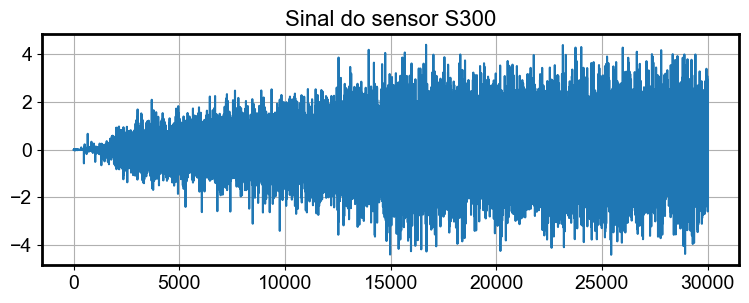

In [246]:
plt.figure(figsize=[9,3])
plt.plot(X_train.T[:,300])
plt.title('Sinal do sensor S300',size=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim([-0.06,-0.02])
plt.show()


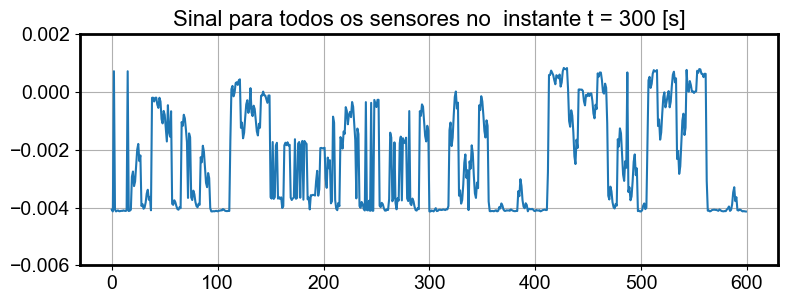

In [247]:
plt.figure(figsize=[9,3])
plt.plot(X_train[:,300])
plt.title('Sinal para todos os sensores no  instante t = 300 [s]',size=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.ylim([-0.006,0.002])
plt.show()

# PCA - Principal components analysis

In [248]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled_np = np.array(df_scaled,dtype=float)
df_np = np.array(df,dtype=float)


In [249]:
df_scaled

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
0,-0.002482,-0.002749,-0.001162,-0.002481,-0.002799,-0.002948,-0.002997,-0.002849,-0.002898,-0.002886,...,-0.003271,-0.002531,-0.002588,-0.002461,-0.002487,-0.002648,-0.002835,-0.002906,-0.002698,-0.002765
1,0.000183,0.000420,0.001669,0.000184,0.000477,0.000640,0.000708,0.000525,0.000588,0.000592,...,0.001264,0.000212,0.000265,0.000157,0.000181,0.000312,0.000507,0.000589,0.000374,0.000430
2,0.004853,0.006000,0.006497,0.004854,0.006210,0.006922,0.007172,0.006441,0.006678,0.006670,...,0.009124,0.005029,0.005255,0.004771,0.004856,0.005501,0.006368,0.006696,0.005771,0.006054
3,0.006989,0.008506,0.008475,0.006991,0.008804,0.009739,0.010070,0.009111,0.009415,0.009400,...,0.012567,0.007228,0.007533,0.006878,0.007004,0.007864,0.009001,0.009439,0.008213,0.008593
4,-0.000142,-0.000098,0.000354,-0.000141,-0.000094,-0.000064,-0.000044,-0.000076,-0.000070,-0.000064,...,0.000071,-0.000144,-0.000136,-0.000144,-0.000144,-0.000127,-0.000088,-0.000070,-0.000116,-0.000105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36231,0.717739,0.807461,0.417402,0.717730,0.824051,0.874838,0.891758,0.840856,0.857811,0.856526,...,0.995226,0.732281,0.750489,0.710765,0.718221,0.769985,0.835483,0.859337,0.790197,0.811988
36232,1.360998,1.301628,-0.770940,1.360999,1.286251,1.226892,1.201763,1.268855,1.249155,1.250686,...,0.868359,1.353675,1.343350,1.364255,1.360781,1.330810,1.274638,1.247291,1.315963,1.297616
36233,-0.311003,-0.300006,0.158517,-0.311002,-0.297112,-0.285217,-0.280181,-0.293629,-0.289766,-0.290053,...,-0.209947,-0.309730,-0.307919,-0.311582,-0.311002,-0.305587,-0.294723,-0.289331,-0.302770,-0.299261
36234,0.166133,0.135292,-0.254736,0.166134,0.128604,0.105358,0.096400,0.121413,0.113680,0.114267,...,0.001264,0.161655,0.155784,0.168229,0.165987,0.149160,0.123759,0.112959,0.141888,0.133511


In [250]:
from sklearn.decomposition import PCA
pca = PCA(.95)
projected = pca.fit(df_scaled_np)
x=projected.transform(df_scaled_np)

In [251]:
x.shape

(36236, 2)

In [252]:
projected.components_

array([[ 0.0283006 ,  0.03367813,  0.0289831 , ...,  0.03694765,
         0.03262004,  0.03395702],
       [-0.05889959, -0.05268054,  0.05820448, ..., -0.04790068,
        -0.05404898, -0.05230647]])

In [253]:
projected.explained_variance_ratio_

array([0.67553757, 0.32446243])

In [254]:
var = projected.explained_variance_ratio_.cumsum()

In [255]:
print(var)

[0.67553757 1.        ]


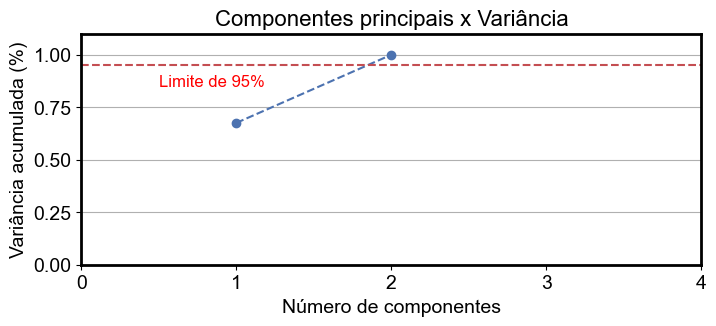

In [256]:
plt.rcParams["figure.figsize"] = (8,3)

fig, ax = plt.subplots()
xi = np.arange(1, 3, step=1)
y = np.cumsum(projected.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Número de componentes',size=14)
plt.xticks(np.arange(0,5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Variância acumulada (%)',size=14)
plt.title('Componentes principais x Variância',size=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.85, 'Limite de 95%', color = 'red', fontsize=12)

ax.grid(axis='x')
plt.show()

# SSPOR- Sparse Sensor Placement Optimization for Reconstruction

In [285]:
model = ps.SSPOR(basis=ps.basis.SVD(n_basis_modes=2),n_sensors=1,optimizer=QR())
model.fit(X_train.T)
sensors_loc = model.get_selected_sensors()

NameError: name 'QR' is not defined

In [273]:
print('O melhor sensor para esses parâmetros é: S',sensors_loc[0])

O melhor sensor para esses parâmetros é: S 394


In [276]:
sensor_coord = sensor
sensor_coord['Sensor'] =df.columns.T
sensor_coord['X_1000'] = sensor_coord['x']*1000
sensor_coord['Y_1000'] = sensor_coord['y']*1000*(-1)

In [277]:
sensor_coord[(sensor_coord['Sensor'] == 'S394')]

,x,y,Sensor,X_1000,Y_1000
393,0.8002,-0.158275,S394,800.2,158.2753


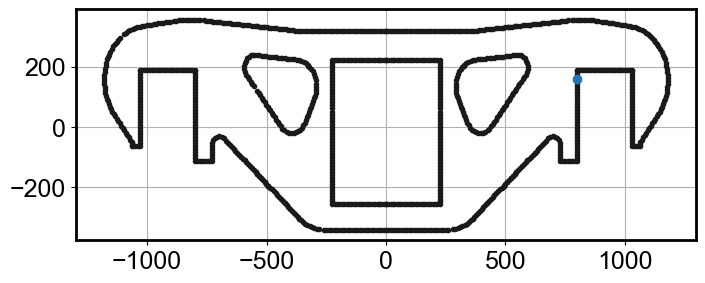

In [279]:
plt.plot(sd_X,sd_Y,'k.',sensor_coord[(sensor_coord['Sensor'] == 'S394')]['X_1000'],sensor_coord[(sensor_coord['Sensor'] == 'S394')]['Y_1000'],'o')

In [283]:
X_test.T.shape

(6236, 600)

In [281]:
import numpy as np
from pysensors import SSPOR
x = np.linspace(0, 1, 501)
monomials = np.vander(x, 15).T

In [282]:
monomials.shape

(15, 501)

In [284]:
import numpy as np
from pysensors import SSPOR
x = np.linspace(0, 1, 501)
monomials = np.vander(x, 15).T
model = SSPOR(n_sensors=5)
model.fit(monomials)
SSPOR(basis=Identity(n_basis_modes=15), n_sensors=5, optimizer=QR())
print(model.selected_sensors)
#    [500 377   0 460 185]
print(x[model.selected_sensors])
#    [1.    0.754 0.    0.92  0.37 ]
model.set_n_sensors(7)
print(x[model.selected_sensors])
#[1.    0.754 0.    0.92  0.37  0.572 0.134]
#f = np.sin(3*x)
#f_pred = model.predict(f[model.selected_sensors])
#print(np.linalg.norm(f - f_pred))

NameError: name 'Identity' is not defined

In [ ]:
#sensor[(sensor['X_1000'] == 316)

In [149]:
model = ps.SSPOR(basis=ps.basis.RandomProjection(n_basis_modes=2),
    n_sensors=2)
model.fit(X_train.T)
sensors = model.get_selected_sensors()

In [151]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

model = ps.reconstruction.SSPOR(n_sensors=2)

param_distributions = {
    "basis": [ps.basis.Identity(), ps.basis.SVD(), ps.basis.RandomProjection()],
    "basis__n_basis_modes": [1,2,3,4,5,6,7,8]
}

search = GridSearchCV(model, param_distributions)
search.fit(X_test.T, quiet=True)
for k, v in search.best_params_.items():
    print(f"{k}:  {v}")

basis:  SVD(n_basis_modes=2)
basis__n_basis_modes:  2


# Variando o número de bases

In [152]:
max_basis_modes = 15
n_sensors = 2

models = [
    (
        'Identity',
        ps.SSPOR(
            n_sensors=n_sensors, 
            basis=ps.basis.Identity(n_basis_modes=max_basis_modes)
        )
    ),
    (
        'SVD',
        ps.SSPOR(
            n_sensors=n_sensors, 
            basis=ps.basis.SVD(n_basis_modes=max_basis_modes)
        )
    ),
    (
        'Random Projection',
        ps.SSPOR(
            n_sensors=n_sensors, 
            basis=ps.basis.RandomProjection(n_basis_modes=max_basis_modes)
        )
    ),
]

In [156]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 15,
    'axes.linewidth': 2,
    'axes.titlesize': 14,
    'axes.edgecolor': 'black',
    'axes.labelsize': 12,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (15, 6),
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'Arial',
    'legend.fontsize': 12,
    'legend.framealpha': 1,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})


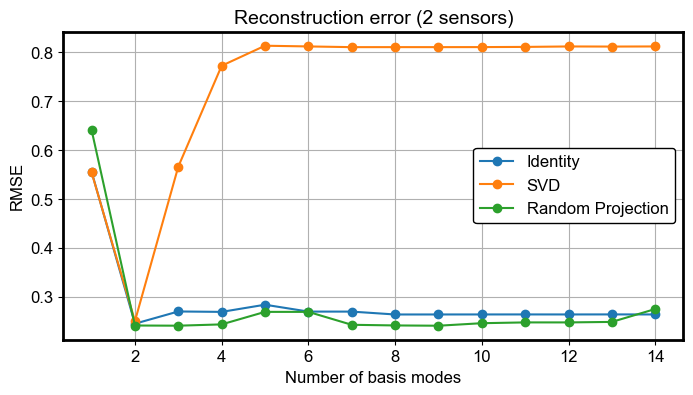

In [158]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set(
    xlabel="Number of basis modes",
    ylabel="RMSE",
    title=f"Reconstruction error ({n_sensors} sensors)",
)

n_basis_modes_range = np.arange(1,15,1)

# Suppress warning arising from selecting fewer basis modes than
# the number of examples passed to the Identity basis
# (results in some examples being thrown away)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)

    for name, model in models:
        model.basis.fit(X_train.T)

        errors = np.zeros_like(n_basis_modes_range, dtype=np.float64)
        for k, n in enumerate(n_basis_modes_range):
            model.update_n_basis_modes(n, X_test.T, quiet=True)
            errors[k] = model.reconstruction_error(X_test.T, [n_sensors])[0]

        ax.plot(n_basis_modes_range, errors, "-o", label=name)

ax.legend()
plt.show()

# Variando o número de sensores

In [159]:
n_basis_modes = 2

models = [
    (
        'Identity',
        ps.SSPOR(basis=ps.basis.Identity(n_basis_modes=n_basis_modes))
    ),
    (
        'SVD',
        ps.SSPOR(basis=ps.basis.SVD(n_basis_modes=n_basis_modes))
    ),
    (
        'Random Projection',
        ps.SSPOR(basis=ps.basis.RandomProjection(n_basis_modes=n_basis_modes))
    ),
]

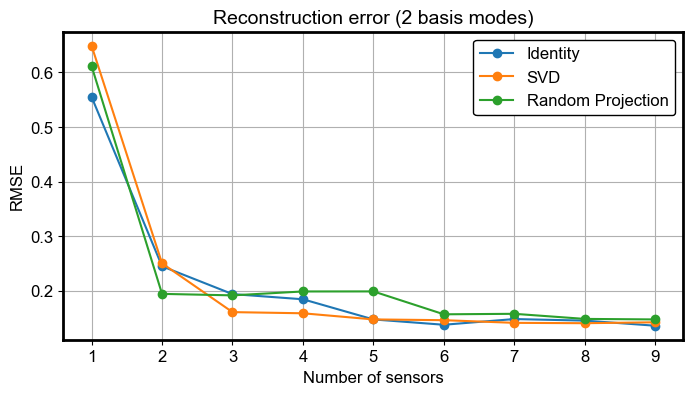

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set(
    xlabel="Number of sensors",
    ylabel="RMSE",
    title=f"Reconstruction error ({n_basis_modes} basis modes)",
)

sensor_range = np.arange(1,10,1)
for name, model in models:
    model.fit(X_train.T, quiet=True)
    
    errors = model.reconstruction_error(X_test.T, sensor_range=sensor_range)
    ax.plot(sensor_range, errors, "-o", label=name)
    
ax.legend()
plt.show()

In [169]:
model = ps.SSPOR().fit(X_train.T)

sensor_range = np.arange(1,5,1)
errors = model.reconstruction_error(X_test.T, sensor_range=sensor_range)

plt.plot(sensor_range, errors, '-o')
plt.xlabel('Number of sensors')
plt.ylabel('Reconstruction error (MSE)')
plt.title('Reconstruction error for different numbers of sensors');

KeyboardInterrupt: 

In [180]:
acc = df

In [181]:
acc

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S591,S592,S593,S594,S595,S596,S597,S598,S599,S600
251,-0.00094,-0.00093,-0.00091,-0.00094,-0.00093,-0.00093,-0.00093,-0.00093,-0.00093,-0.00093,...,-0.00093,-0.00094,-0.00094,-0.00094,-0.00094,-0.00094,-0.00093,-0.00093,-0.00093,-0.00093
252,0.00168,0.00170,0.00191,0.00168,0.00171,0.00172,0.00173,0.00171,0.00172,0.00172,...,0.00177,0.00168,0.00169,0.00167,0.00168,0.00169,0.00171,0.00172,0.00170,0.00170
253,0.00627,0.00633,0.00672,0.00627,0.00633,0.00636,0.00637,0.00634,0.00635,0.00635,...,0.00645,0.00628,0.00629,0.00627,0.00627,0.00630,0.00634,0.00635,0.00632,0.00633
254,0.00837,0.00841,0.00869,0.00837,0.00842,0.00844,0.00845,0.00843,0.00843,0.00843,...,0.00850,0.00838,0.00839,0.00837,0.00838,0.00840,0.00842,0.00843,0.00841,0.00842
255,0.00136,0.00127,0.00060,0.00136,0.00125,0.00120,0.00119,0.00124,0.00122,0.00122,...,0.00106,0.00134,0.00132,0.00137,0.00136,0.00130,0.00124,0.00122,0.00128,0.00126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36562,0.70700,0.67140,0.41603,0.70699,0.66538,0.64736,0.64135,0.65937,0.65336,0.65379,...,0.59360,0.70077,0.69326,0.71007,0.70679,0.68554,0.66128,0.65283,0.67781,0.66976
36563,1.33929,1.08147,-0.76770,1.33929,1.03784,0.90737,0.86388,0.99433,0.95085,0.95407,...,0.51806,1.29417,1.23977,1.36153,1.33778,1.18383,1.00818,0.94698,1.12788,1.06952
36564,-0.30420,-0.24760,0.15815,-0.30420,-0.23810,-0.20940,-0.19990,-0.22850,-0.21900,-0.21970,...,-0.12399,-0.29430,-0.28240,-0.30910,-0.30390,-0.27010,-0.23150,-0.21810,-0.25780,-0.24500
36565,0.16480,0.11362,-0.25350,0.16480,0.10496,0.07906,0.07042,0.09632,0.08769,0.08832,...,0.00177,0.15585,0.14505,0.16922,0.16450,0.13394,0.09907,0.08692,0.12284,0.11125


# EDA

In [183]:
acc_name = acc[['S1','S7','S100','S120','S200','S340','S400','S510','S599','S600']]

In [184]:
acc_name

,S1,S7,S100,S120,S200,S340,S400,S510,S599,S600
251,-0.00094,-0.00093,-0.00093,-0.00091,-0.00092,-0.00092,-0.00094,-0.00091,-0.00093,-0.00093
252,0.00168,0.00173,0.00169,0.00188,0.00182,0.00180,0.00169,0.00188,0.00170,0.00170
253,0.00627,0.00637,0.00631,0.00667,0.00654,0.00651,0.00630,0.00666,0.00632,0.00633
254,0.00837,0.00845,0.00840,0.00866,0.00856,0.00854,0.00840,0.00865,0.00841,0.00842
255,0.00136,0.00119,0.00130,0.00068,0.00090,0.00096,0.00131,0.00070,0.00128,0.00126
...,...,...,...,...,...,...,...,...,...,...
36562,0.70700,0.64135,0.68339,0.44702,0.53185,0.55484,0.68737,0.45250,0.67781,0.66976
36563,1.33929,0.86388,1.16828,-0.54340,0.07102,0.23774,1.19703,-0.50370,1.12788,1.06952
36564,-0.30420,-0.19990,-0.26670,0.10894,-0.02592,-0.06261,-0.27300,0.10025,-0.25780,-0.24500
36565,0.16480,0.07042,0.13086,-0.20900,-0.08699,-0.05392,0.13657,-0.20110,0.12284,0.11125


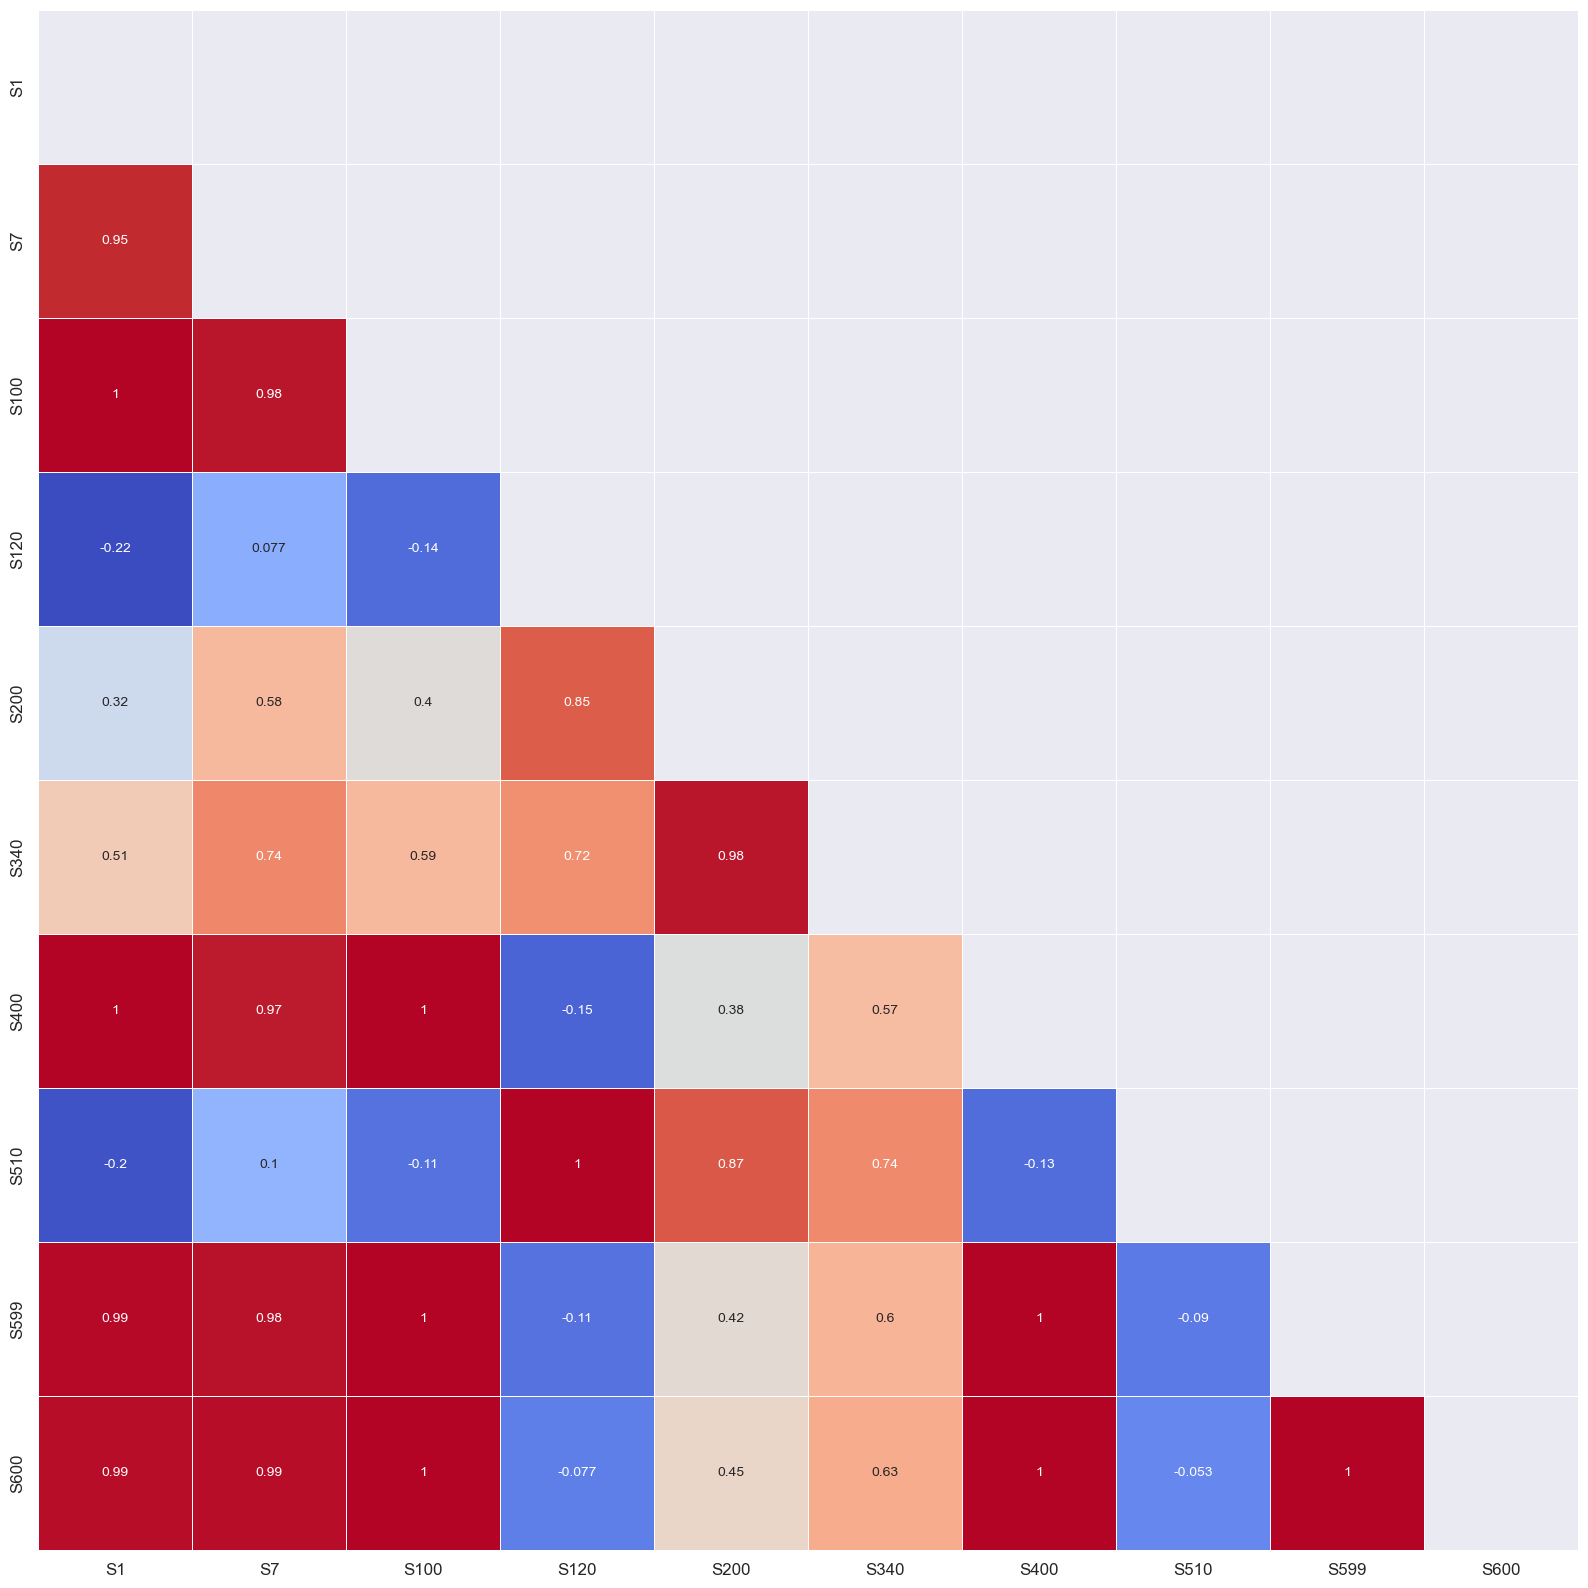

In [185]:
heat_map(acc_name, 'pearson')

In [45]:
acc_small = df[['S1','S3','S187','S320','S200','S314','S400','S410','S560','S600']]
acc_small

,S1,S3,S187,S320,S200,S314,S400,S410,S560,S600
250,-0.00121,-0.00124,-0.00122,-0.00123,-0.00123,-0.00121,-0.00121,-0.00121,-0.00124,-0.00121
251,-0.00094,-0.00091,-0.00093,-0.00092,-0.00092,-0.00094,-0.00094,-0.00094,-0.00091,-0.00093
252,0.00168,0.00191,0.00176,0.00183,0.00182,0.00167,0.00169,0.00168,0.00190,0.00170
253,0.00627,0.00672,0.00644,0.00657,0.00654,0.00627,0.00630,0.00627,0.00670,0.00633
254,0.00837,0.00869,0.00850,0.00859,0.00856,0.00837,0.00840,0.00838,0.00867,0.00842
...,...,...,...,...,...,...,...,...,...,...
36562,0.70700,0.41603,0.59502,0.51143,0.53185,0.71028,0.68737,0.70473,0.43019,0.66976
36563,1.33929,-0.76770,0.52849,-0.07697,0.07102,1.36314,1.19703,1.32303,-0.66520,1.06952
36564,-0.30420,0.15815,-0.12633,0.00660,-0.02592,-0.30950,-0.27300,-0.30070,0.13566,-0.24500
36565,0.16480,-0.25350,0.00383,-0.11636,-0.08699,0.16953,0.13657,0.16156,-0.23310,0.11125


# Line Plot

# Data Distribution

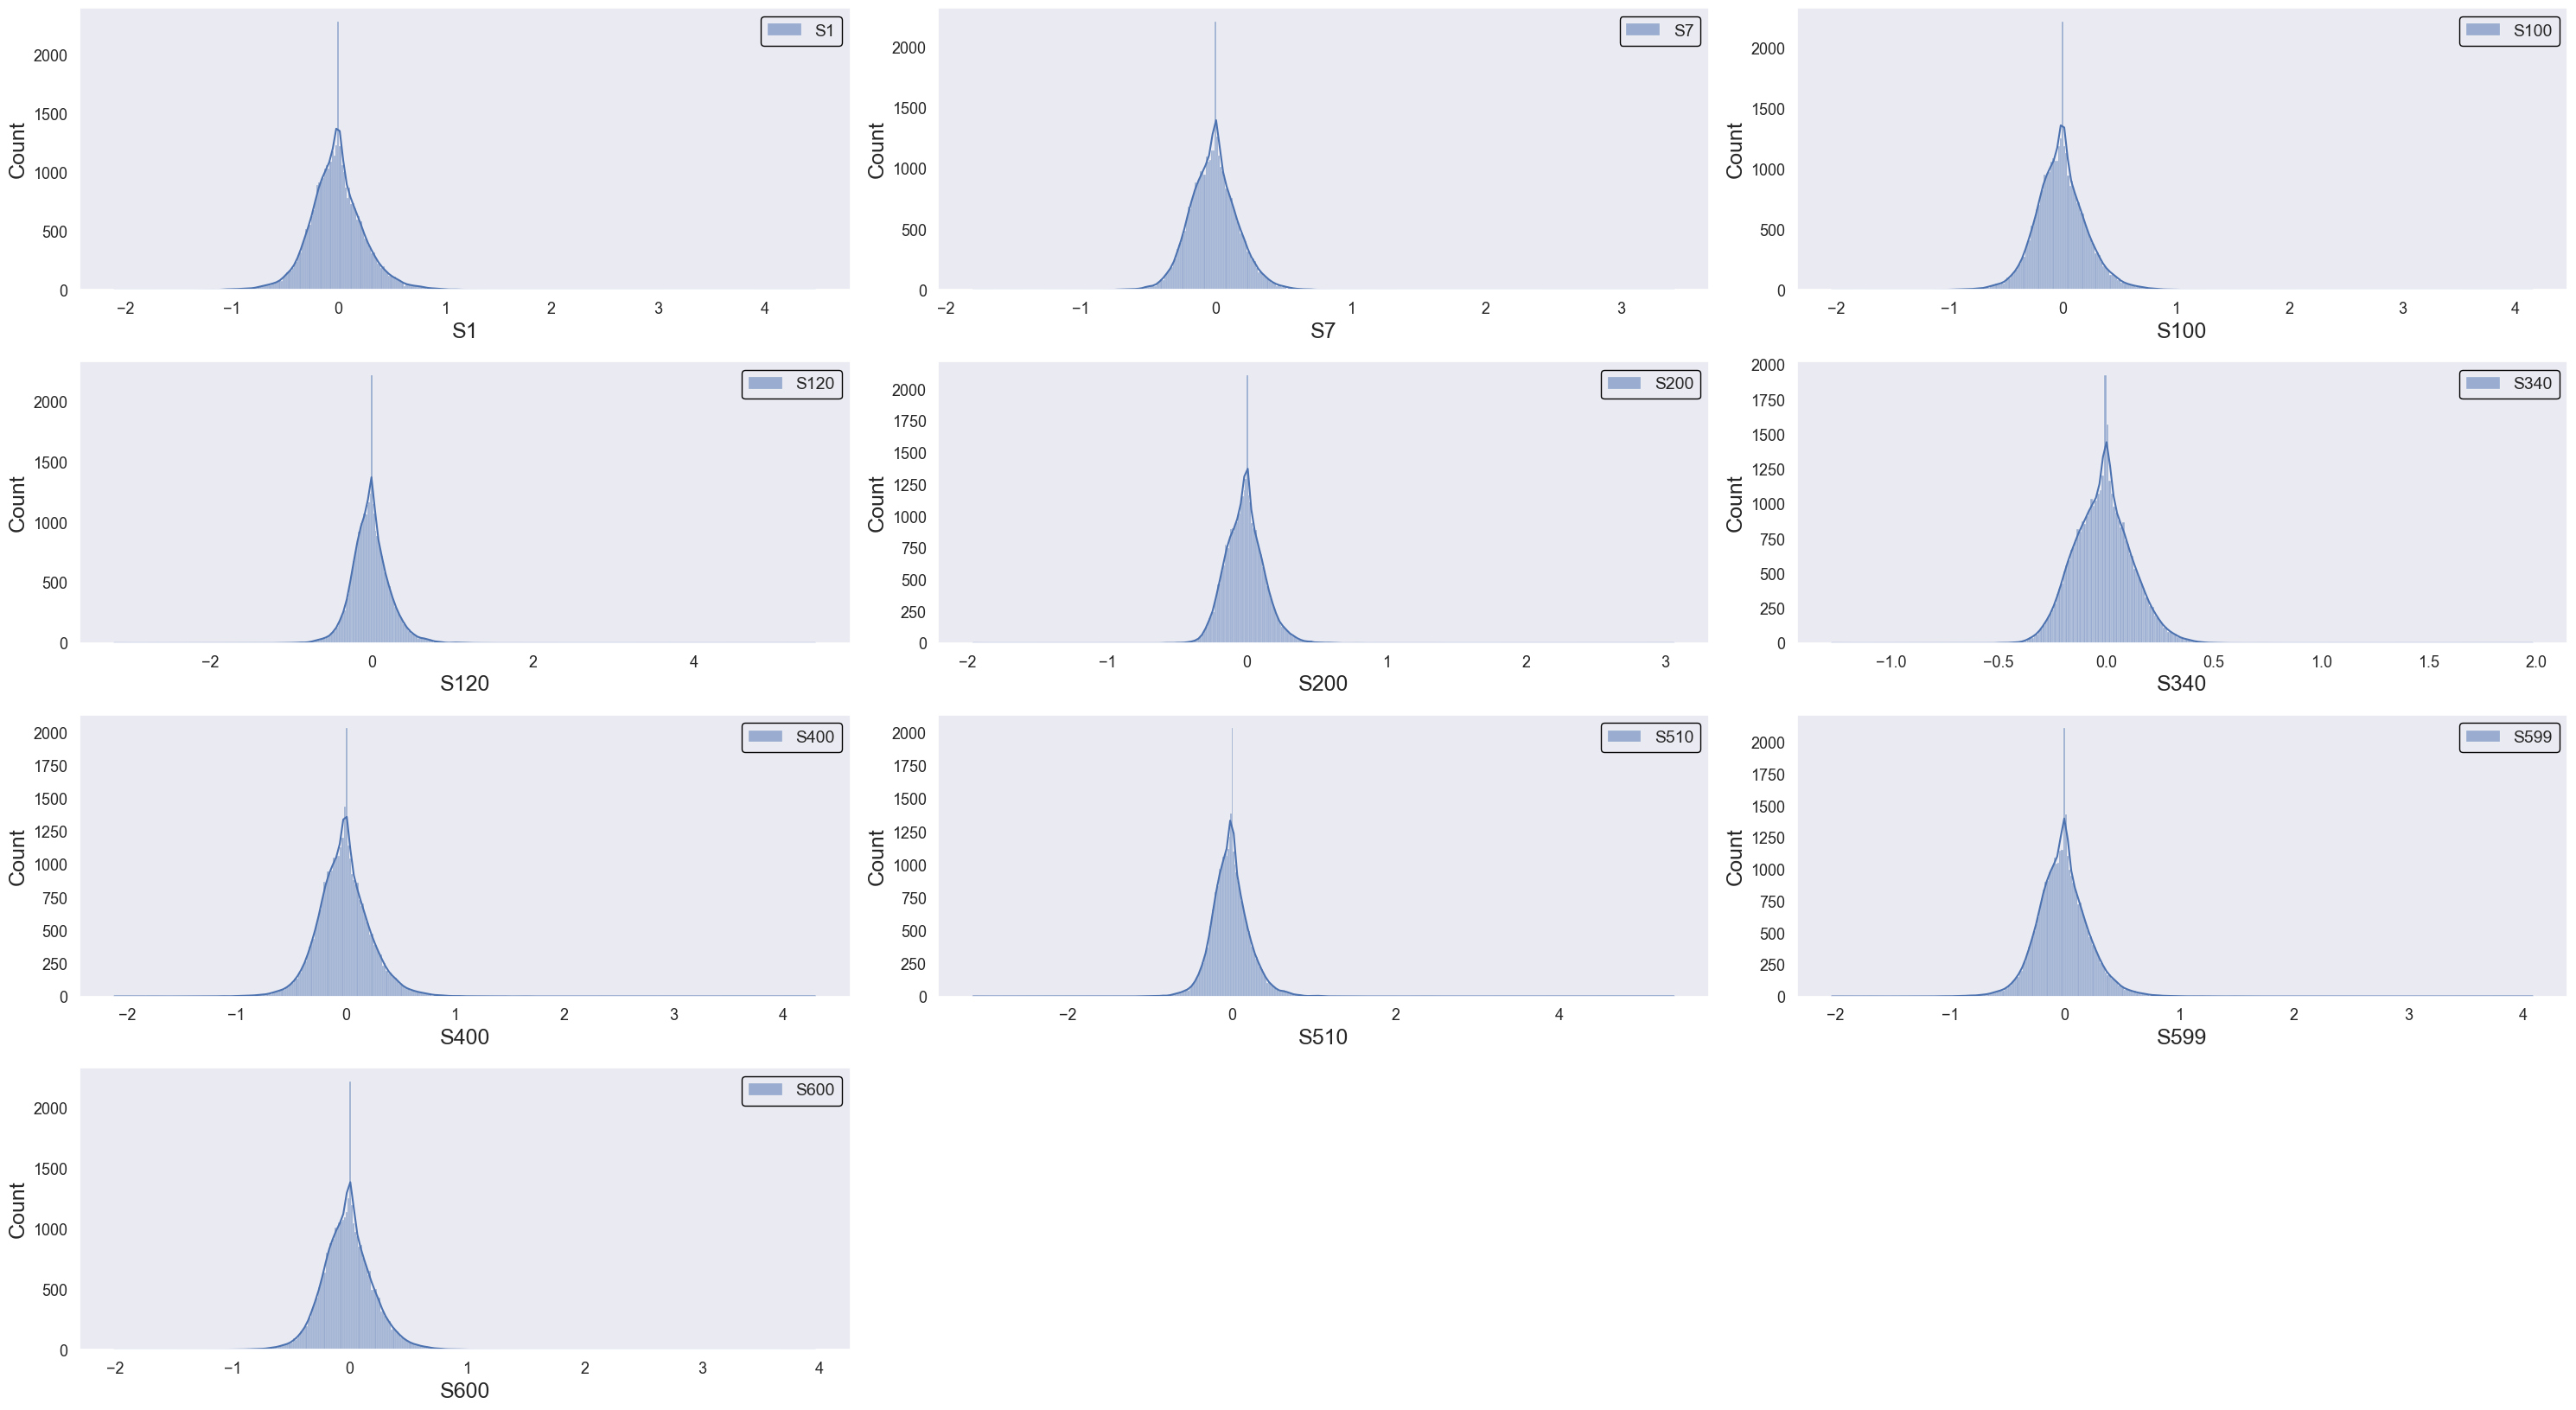

In [79]:
plt.rcParams.update({'figure.figsize': (30, 20)})

col = acc_name.columns

for i in range(len(col)):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=acc_name, x=acc_name.columns[i], kde=True, label = acc_name.columns[i])
    
    
    plt.xlabel(acc_name.columns[i],fontsize=18)
    plt.ylabel('Count',fontsize=18)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=13)
    plt.tick_params(axis='y', which='major', labelsize=13)
    plt.tight_layout()
    plt.legend(fontsize=14)
    plt.grid()

In [ ]:
plt.rcParams.update({'figure.figsize': (30, 20)})

col = acc_small.columns

for i in range(len(col)):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=acc_small, x=acc_small.columns[i], kde=True, label = acc_small.columns[i])
    
    
    plt.xlabel(acc_small.columns[i],fontsize=18)
    plt.ylabel('Count',fontsize=18)
    locs, labels = plt.xticks()
    plt.tick_params(axis='x', which='major', labelsize=13)
    plt.tick_params(axis='y', which='major', labelsize=13)
    plt.tight_layout()
    plt.legend(fontsize=14)
    plt.grid()

In [ ]:
agakldujljalajlkhd.hqofyhl;

In [82]:
#round?

In [17]:
X_sup = round(sd_X.max(),ndigits=1)
X_inf = round(sd_X.min(),ndigits=1)
X_sup, X_inf

(1180.0, -1180.0)

In [18]:
#np.floor?

In [19]:
Y_sup = int(np.floor(sd_Y.max()))
#Y_inf = int(np.floor(sd_Y.min()))
Y_inf = - 345
Y_sup, Y_inf

(355, -345)

In [20]:
X_vec = np.arange(X_inf,X_sup+5,5)
Y_vec = np.arange(Y_inf,Y_sup+5,5)

In [21]:
Y_vec

array([-345, -340, -335, -330, -325, -320, -315, -310, -305, -300, -295,
       -290, -285, -280, -275, -270, -265, -260, -255, -250, -245, -240,
       -235, -230, -225, -220, -215, -210, -205, -200, -195, -190, -185,
       -180, -175, -170, -165, -160, -155, -150, -145, -140, -135, -130,
       -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,  -80,  -75,
        -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,  -25,  -20,
        -15,  -10,   -5,    0,    5,   10,   15,   20,   25,   30,   35,
         40,   45,   50,   55,   60,   65,   70,   75,   80,   85,   90,
         95,  100,  105,  110,  115,  120,  125,  130,  135,  140,  145,
        150,  155,  160,  165,  170,  175,  180,  185,  190,  195,  200,
        205,  210,  215,  220,  225,  230,  235,  240,  245,  250,  255,
        260,  265,  270,  275,  280,  285,  290,  295,  300,  305,  310,
        315,  320,  325,  330,  335,  340,  345,  350,  355])

In [22]:
print(len(X_vec))
print(len(Y_vec))

473
141


# Simulation data 

In [28]:
acc_FR = pd.read_excel(r'C:\Users\DELL\Desktop\PG\SC_irr\simu_sc.xlsx', sheet_name=0,header=0)
#acc_FR.drop(list(np.arange(0,250,1)),inplace=True) # Removing segment of track without irregularities
acc_FR.drop(list(np.arange(0,250,1)),inplace=True) # Removing segment of track without irregularities
time = acc_FR['time']
acc_FR.drop('time', inplace=True, axis=1)

In [29]:
acc_FR = acc_FR +9.81

In [30]:
acc_FR

,S47,S47_Copy_1,S48,S48_Copy_1,S49_Copy_1,S50,S51,S50_Copy_1,S51_Copy_1,S52,...,S80,S80_Copy_1,S64_Copy_1,S63_Copy_1,S59_Copy_1,S56_Copy_1,S46_Copy_1,S19_Copy_1,S3_Copy_1,S2_Copy_1
250,0.11903,-0.06659,0.11903,-0.06660,-0.06660,0.10356,0.08809,-0.05113,-0.03566,0.07262,...,0.37581,-0.32340,-0.26770,-0.29860,-0.12847,-0.08206,-0.06659,-0.19030,-0.25220,-0.28310
251,0.21931,0.29834,0.21931,0.29834,0.29834,0.22589,0.23248,0.29175,0.28516,0.23906,...,0.10999,0.40767,0.38397,0.39714,0.32468,0.30493,0.29834,0.35103,0.37738,0.39055
252,-0.02017,-0.06381,-0.02018,-0.06381,-0.06381,-0.02381,-0.02745,-0.06017,-0.05654,-0.03108,...,0.04019,-0.12415,-0.11106,-0.11833,-0.07835,-0.06744,-0.06380,-0.09288,-0.10742,-0.11469
253,-0.29230,-0.12349,-0.29230,-0.12350,-0.12350,-0.27820,-0.26420,-0.13756,-0.15163,-0.25010,...,-0.52580,0.11000,0.05937,0.08750,-0.06723,-0.10943,-0.12349,-0.01096,0.04530,0.07343
254,-0.15810,0.11347,-0.15810,0.11347,0.11347,-0.13547,-0.11284,0.09084,0.06821,-0.09021,...,-0.53380,0.48914,0.40767,0.45293,0.20399,0.13610,0.11347,0.29452,0.38504,0.43030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,-0.00115,-0.00072,-0.00115,-0.00072,-0.00072,-0.00111,-0.00108,-0.00075,-0.00079,-0.00104,...,-0.00174,-0.00012,-0.00025,-0.00018,-0.00057,-0.00068,-0.00072,-0.00043,-0.00028,-0.00021
4278,-0.00111,-0.00055,-0.00111,-0.00055,-0.00055,-0.00106,-0.00102,-0.00060,-0.00065,-0.00097,...,-0.00188,0.00022,0.00005,0.00015,-0.00037,-0.00051,-0.00055,-0.00018,0.00001,0.00010
4279,-0.00109,-0.00049,-0.00109,-0.00049,-0.00049,-0.00104,-0.00099,-0.00054,-0.00059,-0.00094,...,-0.00191,0.00033,0.00016,0.00026,-0.00029,-0.00044,-0.00049,-0.00009,0.00011,0.00021
4280,-0.00104,-0.00051,-0.00104,-0.00051,-0.00051,-0.00099,-0.00095,-0.00055,-0.00059,-0.00091,...,-0.00177,0.00023,0.00007,0.00016,-0.00033,-0.00046,-0.00051,-0.00015,0.00003,0.00011


In [32]:
#convert dataframe into array
df = np.array(acc_FR.T,dtype=float)
time_arr = np.array(time,dtype=float)
#print(len(time))

In [34]:
time_size = np.zeros(len(time_arr), dtype=float)
X_size = np.zeros(len(X_vec), dtype=float)
Y_size = np.zeros(len(Y_vec), dtype=float)

# Create a 3D array

In [35]:
data = np.array([X_vec,Y_vec,time_size])

In [265]:
X_vec.shape, Y_vec.shape

((473,), (141,))

In [37]:
teste = np.concatenate((X_vec,Y_vec,time_size))

In [38]:
time_size.shape

(4032,)

In [39]:
zeros = np.zeros((4032,141,473),dtype='float16')
#zeros = np.zeros((2361,701, 4182), dtype='float16')


In [40]:
np.shape(zeros)

(4032, 141, 473)

## Achando as coordenadas de cada sensor

In [41]:
sensor_Z

array([ 250.,  250.,  280.,  280.,  280.,  280.,  280.,  280.,  280.,
        280.,  280.,  250.,  250.,  200.,  200.,  150.,  150.,  100.,
        100.,  250.,  250.,   50.,   50.,   -0.,   -0.,  250.,  250.,
        200.,  200.,  150.,  150.,  100.,  100.,  100.,  100.,   50.,
         50.,   50.,   50.,   50.,   50.,  250.,  250.,   -0.,   -0.,
         -0.,   -0.,   -0.,   -0.,   -0.,   -0.,  -50.,  -50.,  -50.,
        -50.,  -50.,  -50.,  -50.,  -50., -100., -100., -100., -100.,
        300.,  300., -100., -100., -100., -100., -100., -100.,  -50.,
        -50.,  -50.,  -50., -100., -100., -150., -150., -200., -200.,
       -250., -250., -300., -300.,  300.,  300., -300., -300., -300.,
       -300., -300., -300., -300., -300., -300., -300., -300., -150.,
       -150., -200., -200., -250., -250., -150., -150.,  300.,  300.,
       -150., -150., -150., -150., -200., -200.,  250.,  250.,  250.,
        250.,  300.,  300.,  300.,  300.,  300.,  300.,  300.,  300.,
        280.,  280.,

In [42]:


# for x in sensor_X: # pra cada sensor na tabela
#     for x_data in data[0]: # pra cada sensor em data
#         if np.allclose(x, x_data, atol=1): # se tiver em 1 milimetro de distancia
#             print(x, x_data)
            
for x in sensor_Z: # pra cada sensor na tabela
    for x_data in data[1]: # pra cada sensor em data
        if np.allclose(x, x_data, atol=1): # se tiver em 1 milimetro de distancia
            print(x, x_data)

250.0 250
250.0 250
280.0 280
280.0 280
280.0 280
280.0 280
280.0 280
280.0 280
280.0 280
280.0 280
280.0 280
250.0 250
250.0 250
200.0 200
200.0 200
150.0 150
150.0 150
100.0 100
100.0 100
250.0 250
250.0 250
50.0 50
50.0 50
-0.0 0
-0.0 0
250.0 250
250.0 250
200.0 200
200.0 200
150.0 150
150.0 150
100.0 100
100.0 100
100.0 100
100.0 100
50.0 50
50.0 50
50.0 50
50.0 50
50.0 50
50.0 50
250.0 250
250.0 250
-0.0 0
-0.0 0
-0.0 0
-0.0 0
-0.0 0
-0.0 0
-0.0 0
-0.0 0
-50.0 -50
-50.0 -50
-50.0 -50
-50.0 -50
-50.0 -50
-50.0 -50
-50.0 -50
-50.0 -50
-100.0 -100
-100.0 -100
-100.0 -100
-100.0 -100
300.0 300
300.0 300
-100.0 -100
-100.0 -100
-100.0 -100
-100.0 -100
-100.0 -100
-100.0 -100
-50.0 -50
-50.0 -50
-50.0 -50
-50.0 -50
-100.0 -100
-100.0 -100
-150.0 -150
-150.0 -150
-200.0 -200
-200.0 -200
-250.0 -250
-250.0 -250
-300.0 -300
-300.0 -300
300.0 300
300.0 300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-300.0 -300
-150

In [43]:
#sensor[sensor['X_1000'].isin(data[0])]

In [44]:
#sensor[(sensor['X_1000'] == 316) & (sensor['Z_1000'] == 156)]

In [45]:
coords = []
# for z in sensor['Z_1000']:
#     for x in sensor['X_1000']:
#         coords.append((np.where(data[0] == x), np.where(data[1] == z)))


for x, z in zip(sensor['X_1000'], sensor['Z_1000']):
    coords.append((np.where(data[0] == x), np.where(data[1] == z)))
    

### Coordenadas prontas

In [46]:
coords

[((array([16], dtype=int64),), (array([19], dtype=int64),)),
 ((array([456], dtype=int64),), (array([19], dtype=int64),)),
 ((array([156], dtype=int64),), (array([13], dtype=int64),)),
 ((array([316], dtype=int64),), (array([13], dtype=int64),)),
 ((array([176], dtype=int64),), (array([13], dtype=int64),)),
 ((array([296], dtype=int64),), (array([13], dtype=int64),)),
 ((array([196], dtype=int64),), (array([13], dtype=int64),)),
 ((array([276], dtype=int64),), (array([13], dtype=int64),)),
 ((array([216], dtype=int64),), (array([13], dtype=int64),)),
 ((array([256], dtype=int64),), (array([13], dtype=int64),)),
 ((array([236], dtype=int64),), (array([13], dtype=int64),)),
 ((array([96], dtype=int64),), (array([19], dtype=int64),)),
 ((array([376], dtype=int64),), (array([19], dtype=int64),)),
 ((array([96], dtype=int64),), (array([29], dtype=int64),)),
 ((array([376], dtype=int64),), (array([29], dtype=int64),)),
 ((array([96], dtype=int64),), (array([39], dtype=int64),)),
 ((array([37

In [47]:
sensor.loc[sensor['Sensor']=='S57_Copy_1']

,Sensor,X,Z,Z_1000,X_1000
101,S57_Copy_1,0.35,0.2,200.0,350.0


In [48]:
coords[0]

((array([16], dtype=int64),), (array([19], dtype=int64),))

### Primeiro sensor (primeira coordenada)

In [49]:
data[0][386], data[1][19]

(750.0, -250)

### Qual é o nome do sensor

In [50]:
sensor[(sensor['X_1000'] == data[0][386]) & (sensor['Z_1000'] == data[1][19])]['Sensor']

143    S77_Copy_1
Name: Sensor, dtype: object

### Qual é a acelaração dele no ponto t=100

In [54]:
f = acc_FR.T.loc[sensor[(sensor['X_1000'] == data[0][16]) & (sensor['Z_1000'] == data[1][19])]['Sensor']]

In [55]:
acc_FR['S57_Copy_1']

250    -0.08206
251     0.30492
252    -0.06744
253    -0.10943
254     0.13610
         ...   
4277   -0.00068
4278   -0.00051
4279   -0.00044
4280   -0.00046
4281   -0.00048
Name: S57_Copy_1, Length: 4032, dtype: float64

# Colocando a aceleração nos pontos  dos sensores

In [219]:
for coord in tqdm.tqdm(coords):
    
    x = coord[0][0][0]
    y = coord[1][0][0]

#     try:
    zeros[:,y, x] = acc_FR.loc[:, sensor[(sensor['X_1000'] == data[0][x]) & (sensor['Z_1000'] == data[1][y])]['Sensor']].values.ravel()
#     except Exception as e:
#         print(e)
    

100%|████████████████████████████████████████████████████████████████████████████████| 154/154 [00:03<00:00, 50.42it/s]


In [220]:
coord

((array([336], dtype=int64),), (array([13], dtype=int64),))

Conferindo se a aceleração ta certa mesmo

In [221]:
np.shape(zeros)

(4032, 141, 473)

In [222]:
print(x)

336


In [223]:
print(y)

13


In [224]:
#matriz com aceleração (ultimo ponto)
zeros[:, y, x]

array([-1.284e-01,  3.247e-01, -7.831e-02, ..., -2.899e-04, -3.300e-04,
       -3.600e-04], dtype=float16)

Aparentemente ta certa

# Plot side frame com acc no local dos sensores

In [225]:
len(X_vec)

473

In [226]:
acc_FR.max()

S47            5.78963
S47_Copy_1    19.74511
S48            5.78963
S48_Copy_1    19.74481
S49_Copy_1    19.74451
                ...   
S56_Copy_1    21.17550
S46_Copy_1    19.74541
S19_Copy_1    31.18780
S3_Copy_1     36.90910
S2_Copy_1     39.76930
Length: 154, dtype: float64

In [227]:
zeros_outro = np.swapaxes(zeros, 0, 1)

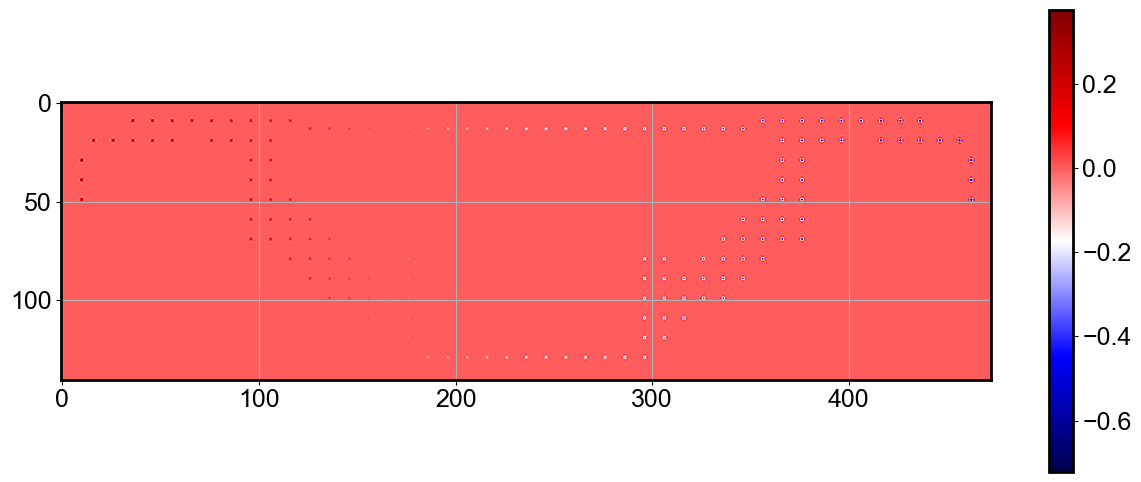

In [228]:
import matplotlib.colors as mcolors
import plotly.express as px
vmin = -3
vmax = 3
#norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)


#plt.xlim([X_inf,X_sup])
#plt.ylim([Y_inf,Y_sup])
plt.imshow(zeros[2000, :, :],interpolation='spline36',cmap = plt.cm.seismic)
plt.colorbar()
#plt.plot(sd_X,sd_Y,'o')
plt.show()


In [229]:
zeros[2000, :, :].shape

(141, 473)

In [230]:
#for i in range(zeros.shape[0]):
#    plt.imshow(zeros[2000, :, :],cmap = plt.cm.seismic)
#plt.savefig('saved_figure.png')

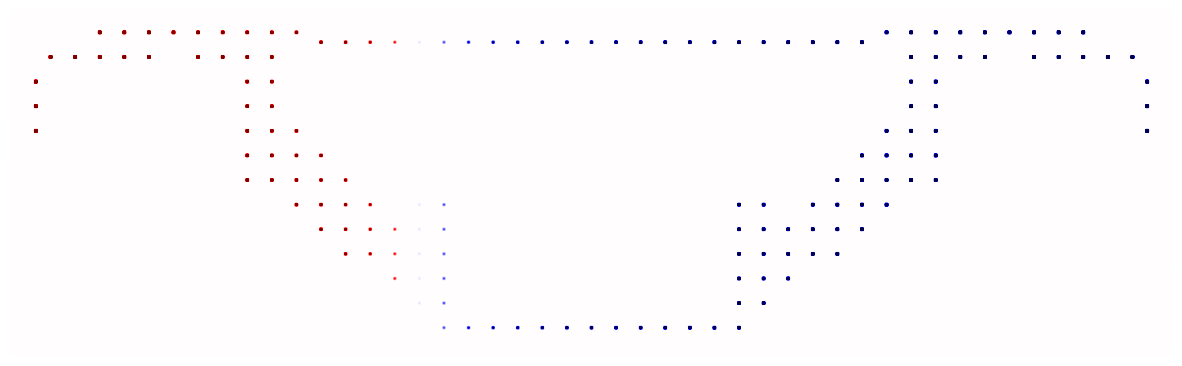

In [231]:
vmin = zeros[2000,:,:].min()
vmax = zeros[2000,:,:].max()
import matplotlib.colors as colors
norm = colors.TwoSlopeNorm(vmin=vmin,vcenter=0, vmax=vmax)
plt.imshow(zeros[2000, :, :]*10,cmap = plt.cm.seismic,norm=norm)
plt.grid(b=None)
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

In [ ]:
Xvec

# SVD - Singular Value Decomposition

In [232]:
df = zeros
arr = np.asarray(df)

In [235]:
import plotly.express as px
#import xarray as xr
#airtemps = xr.tutorial.open_dataset('air_temperature').air.isel(time=500)
#colorbar_title = airtemps.attrs['var_desc'] + '<br>(%s)'%airtemps.attrs['units']
#fig = px.imshow(arr[2000,:,:], color_continuous_scale='RdBu_r', aspect='equal')
#fig.show()


In [236]:
mask = arr

In [237]:
bool_ind = mask == 0

In [238]:
import numpy.ma as ma
mx = ma.make_mask(bool_ind)

In [239]:
masked_vec = ma.masked_array(arr, mask=mx)

In [240]:
arr.shape

(4032, 141, 473)

In [241]:
Y = np.zeros((arr.shape[1]*arr.shape[2],arr.shape[0]),dtype='float16')

In [242]:
ts = arr.shape[0]
N = arr.shape[1]*arr.shape[2]

In [243]:
for i in range(0,ts):
    snapshot = np.reshape(masked_vec[i,:,:],(N,1))
    Y[:,i] = snapshot[:,0]

In [244]:
snapshot[:,0].shape

(66693,)

In [245]:
#Train and Test data
tdata = int(np.round_(arr.shape[0]*0.8))
#X_train, X_test = Y[:,:tdata], Y[tdata:]
#Y.shape

In [246]:
Iord = np.arange(1,ts)

In [247]:
Itrain = Iord[0:tdata]

In [248]:
Itest = Iord[tdata:]

In [249]:
X_train =Y[:,Itrain]
meansst =np.mean(X_train, axis=1)
for i in range(0,tdata):
    X_train[:,i] = X_train[:,i] - meansst

In [250]:
X_test =Y[:,Itest]
meansst =np.mean(X_test,axis=1)
for i in range(0,arr.shape[0]-tdata-1):
    X_test[:,i] = X_test[:,i] - meansst

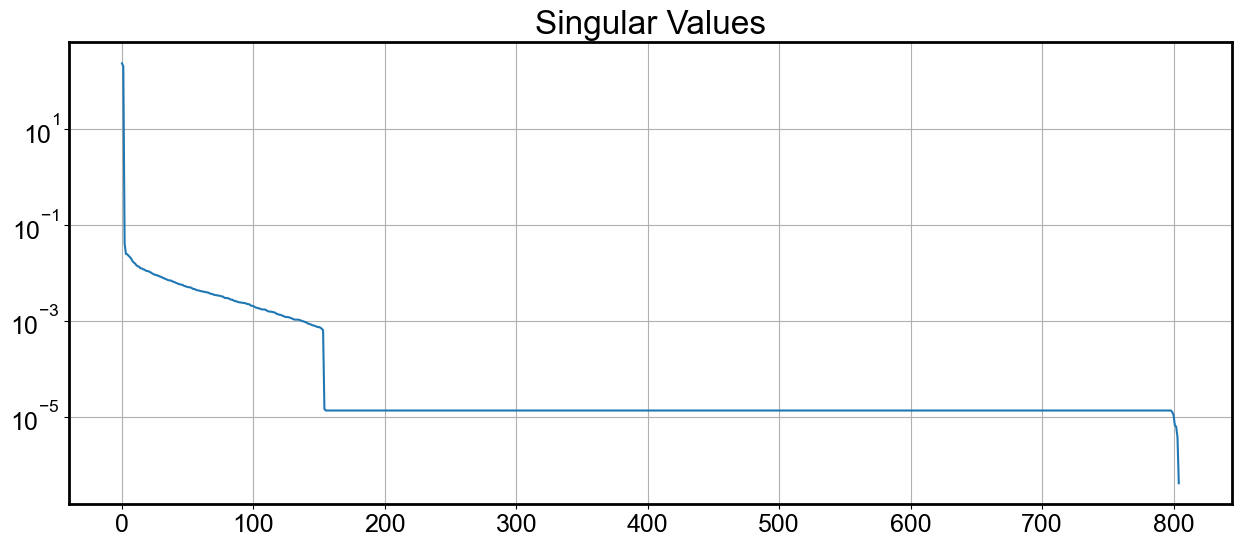

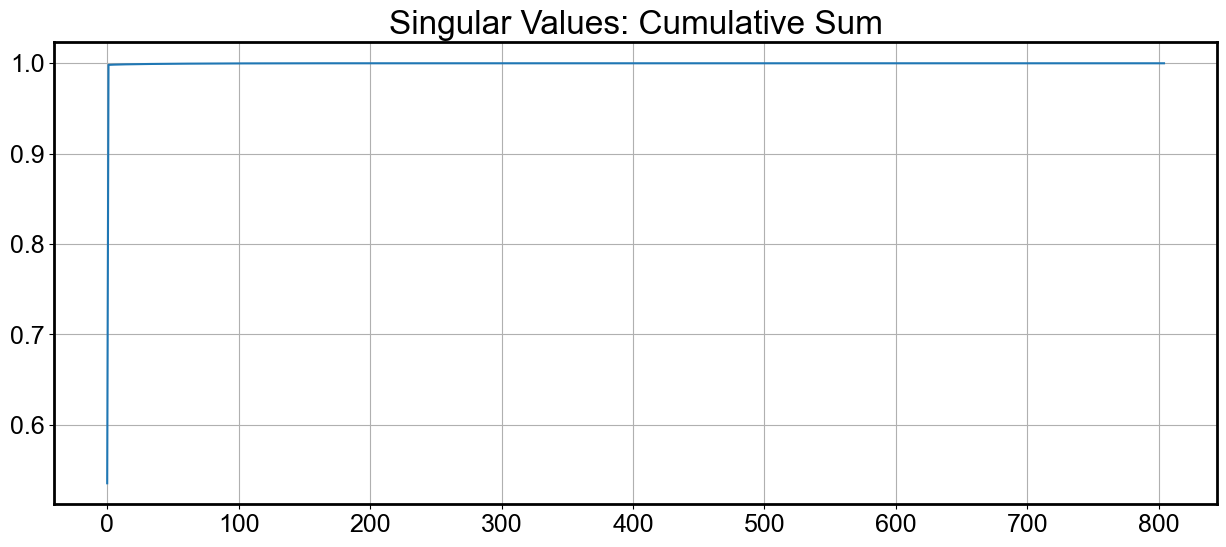

In [251]:
from scipy.linalg import svd
U,S,V_T = svd(X_test, full_matrices=False)
S = np.diag(S)

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
#plt.ylim([10,10**(4)])
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
#plt.xlim([0,5])
plt.show()

In [260]:
r = 154
X_desnoided = U[:, :r] @  S[0:r, :r] @ V_T[:r, :]

In [261]:
X_desnoided.shape

(66693, 805)

In [285]:
S.shape

(805, 805)

In [ ]:
#for i in range(0, ts):
    #Y2[:,i] = np.reshape(zeros[i,:,:],(arr.shape[1]*arr.shape[2]))

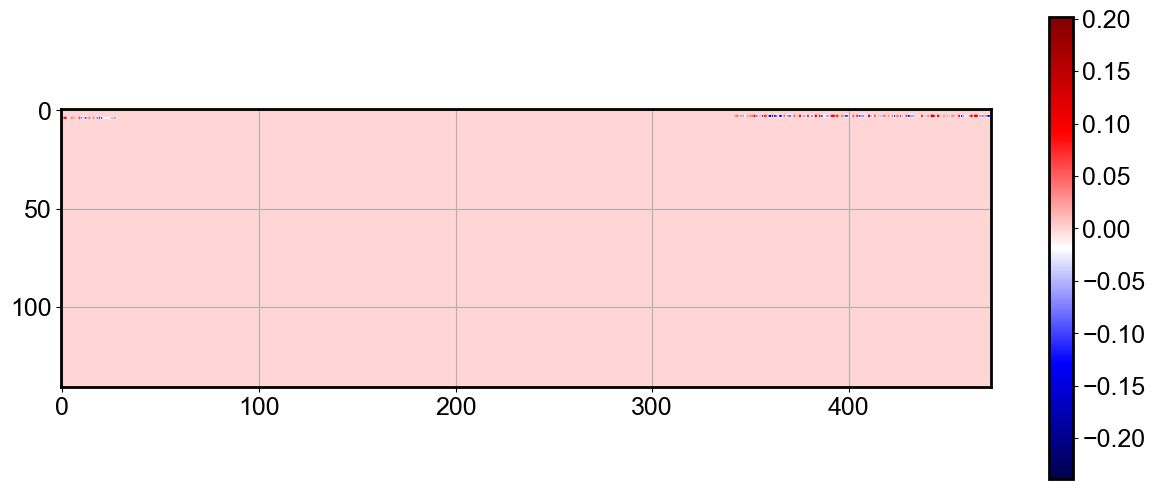

In [210]:
import matplotlib.colors as mcolors
import plotly.express as px
vmin = -3
vmax = 3
plt.imshow(np.reshape(U[:,2000],(arr.shape[1],arr.shape[2])),cmap = plt.cm.seismic)
plt.colorbar()
#plt.plot(sd_X,sd_Y,'o')
plt.show()

In [43]:
def heat_map(data,method):
    sns.set(font_scale=1.1)
    corr=data.corr(method=method)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,cmap="coolwarm", linewidths=0.5, annot=True, annot_kws={"size":10},mask=mask,square=True,cbar=False)
    plt.show()
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

In [44]:
from scipy.stats import pearsonr
def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

In [ ]:
U,S,V_T = svd(acc_vec, full_matrices=False)
S = np.diag(S)

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.xlim([0,5])
plt.show()

In [127]:
teste = df2.T

In [130]:
acc_name

,300,2000,800,1000,250,1200,4000
time,3.00000,20.00000,7.99999,9.99999,2.50000,12.00000,40.00000
S47,-9.68887,-9.44277,-9.05582,-9.68341,-9.69097,-9.43566,-9.00216
S47_Copy_1,-9.70800,-8.84091,-9.30567,-10.30800,-9.87659,-10.39330,-8.78030
S48,-9.68887,-9.44279,-9.05582,-9.68341,-9.69097,-9.43566,-9.00216
S48_Copy_1,-9.70800,-8.84093,-9.30567,-10.30800,-9.87660,-10.39330,-8.78031
...,...,...,...,...,...,...,...
S56_Copy_1,-9.70959,-8.79073,-9.32648,-10.36010,-9.89206,-10.47310,-8.76181
S46_Copy_1,-9.70799,-8.84089,-9.30566,-10.30800,-9.87659,-10.39330,-8.78029
S19_Copy_1,-9.72074,-8.43955,-9.47221,-10.72440,-10.00030,-11.03180,-8.63236
S3_Copy_1,-9.72711,-8.23886,-9.55548,-10.93260,-10.06220,-11.35100,-8.55840


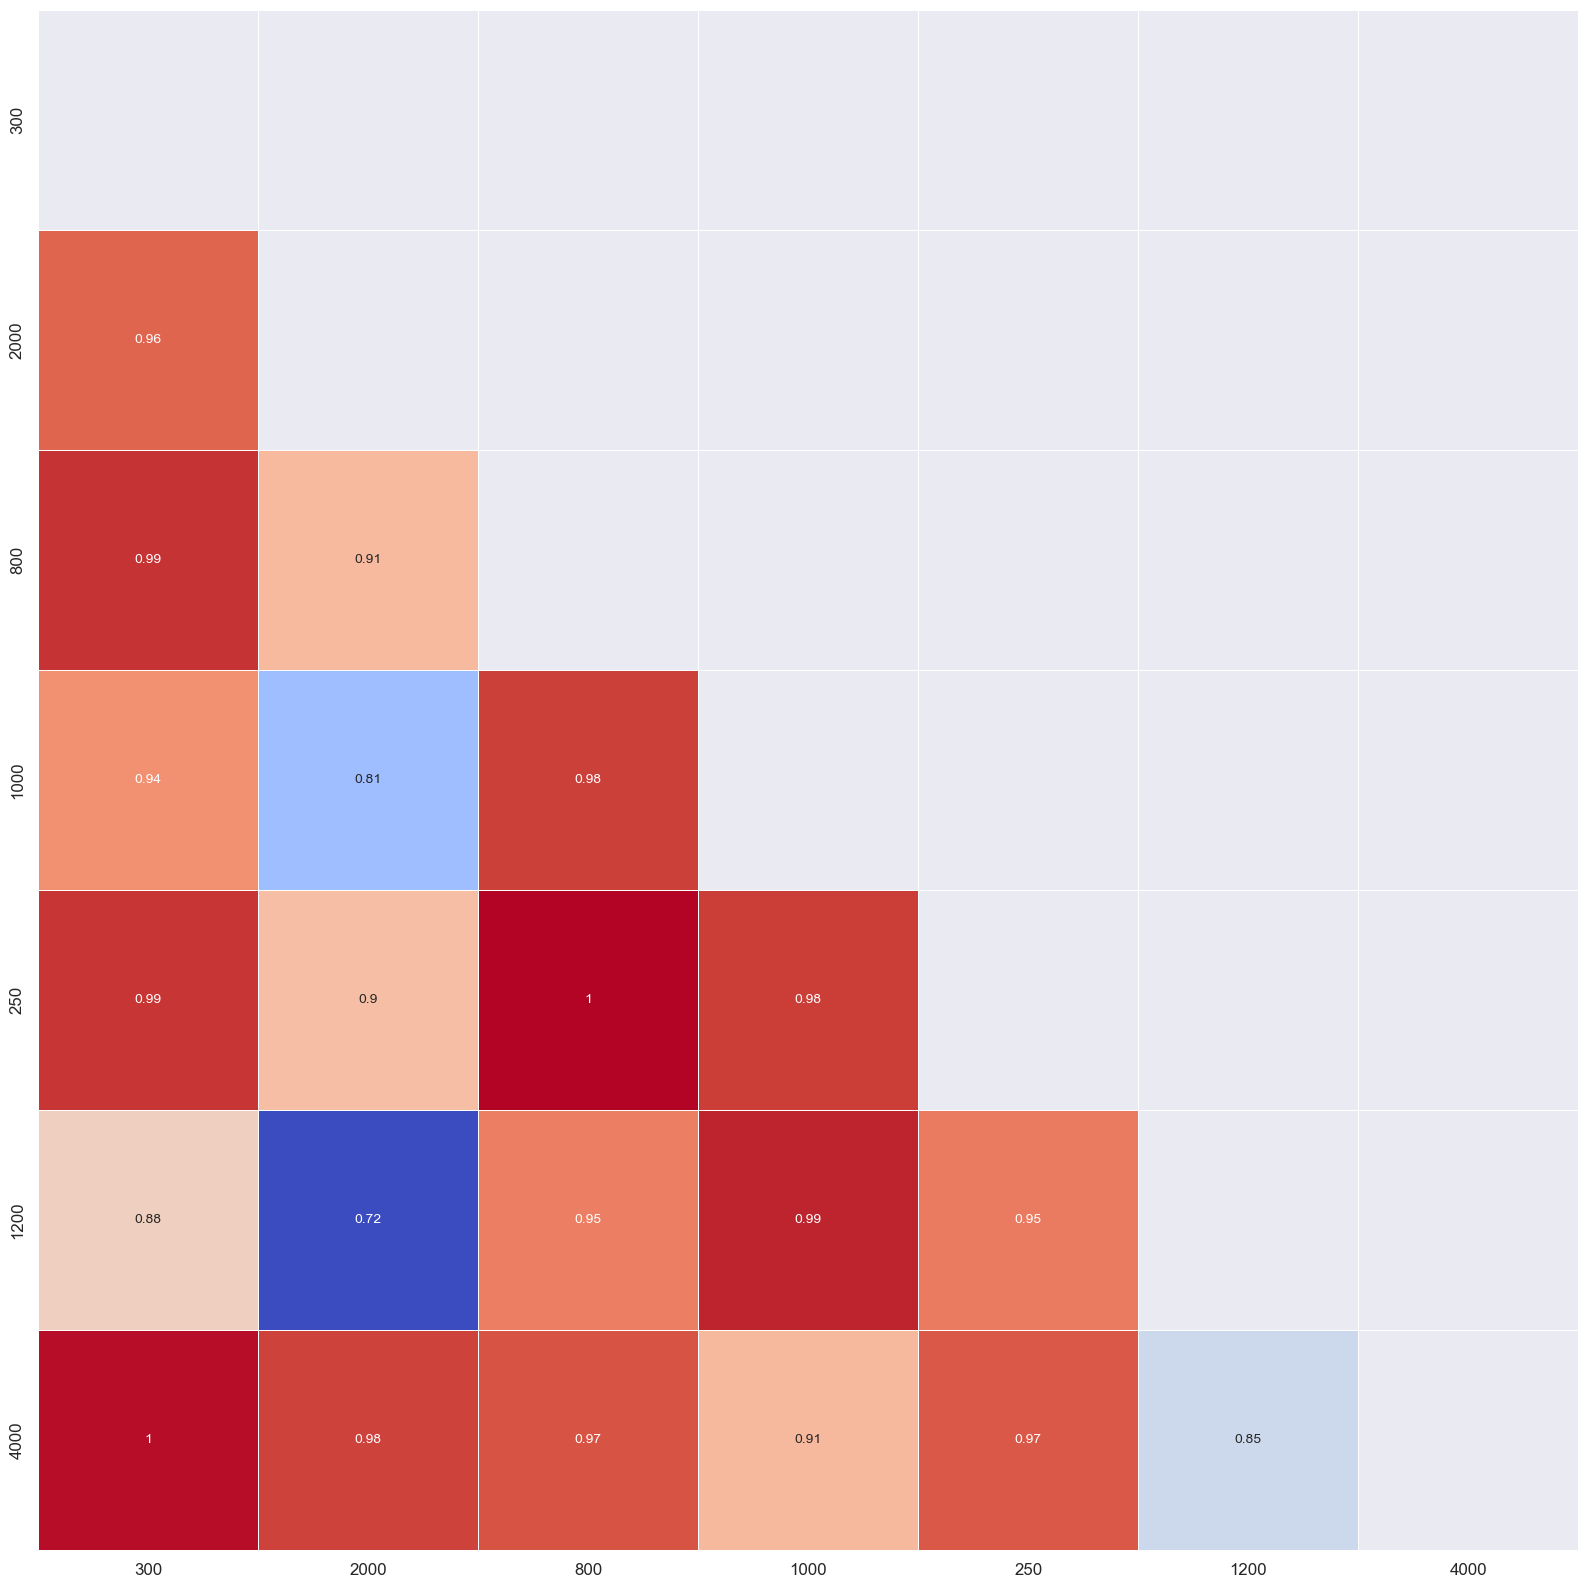

In [131]:
heat_map(acc_name, 'pearson')

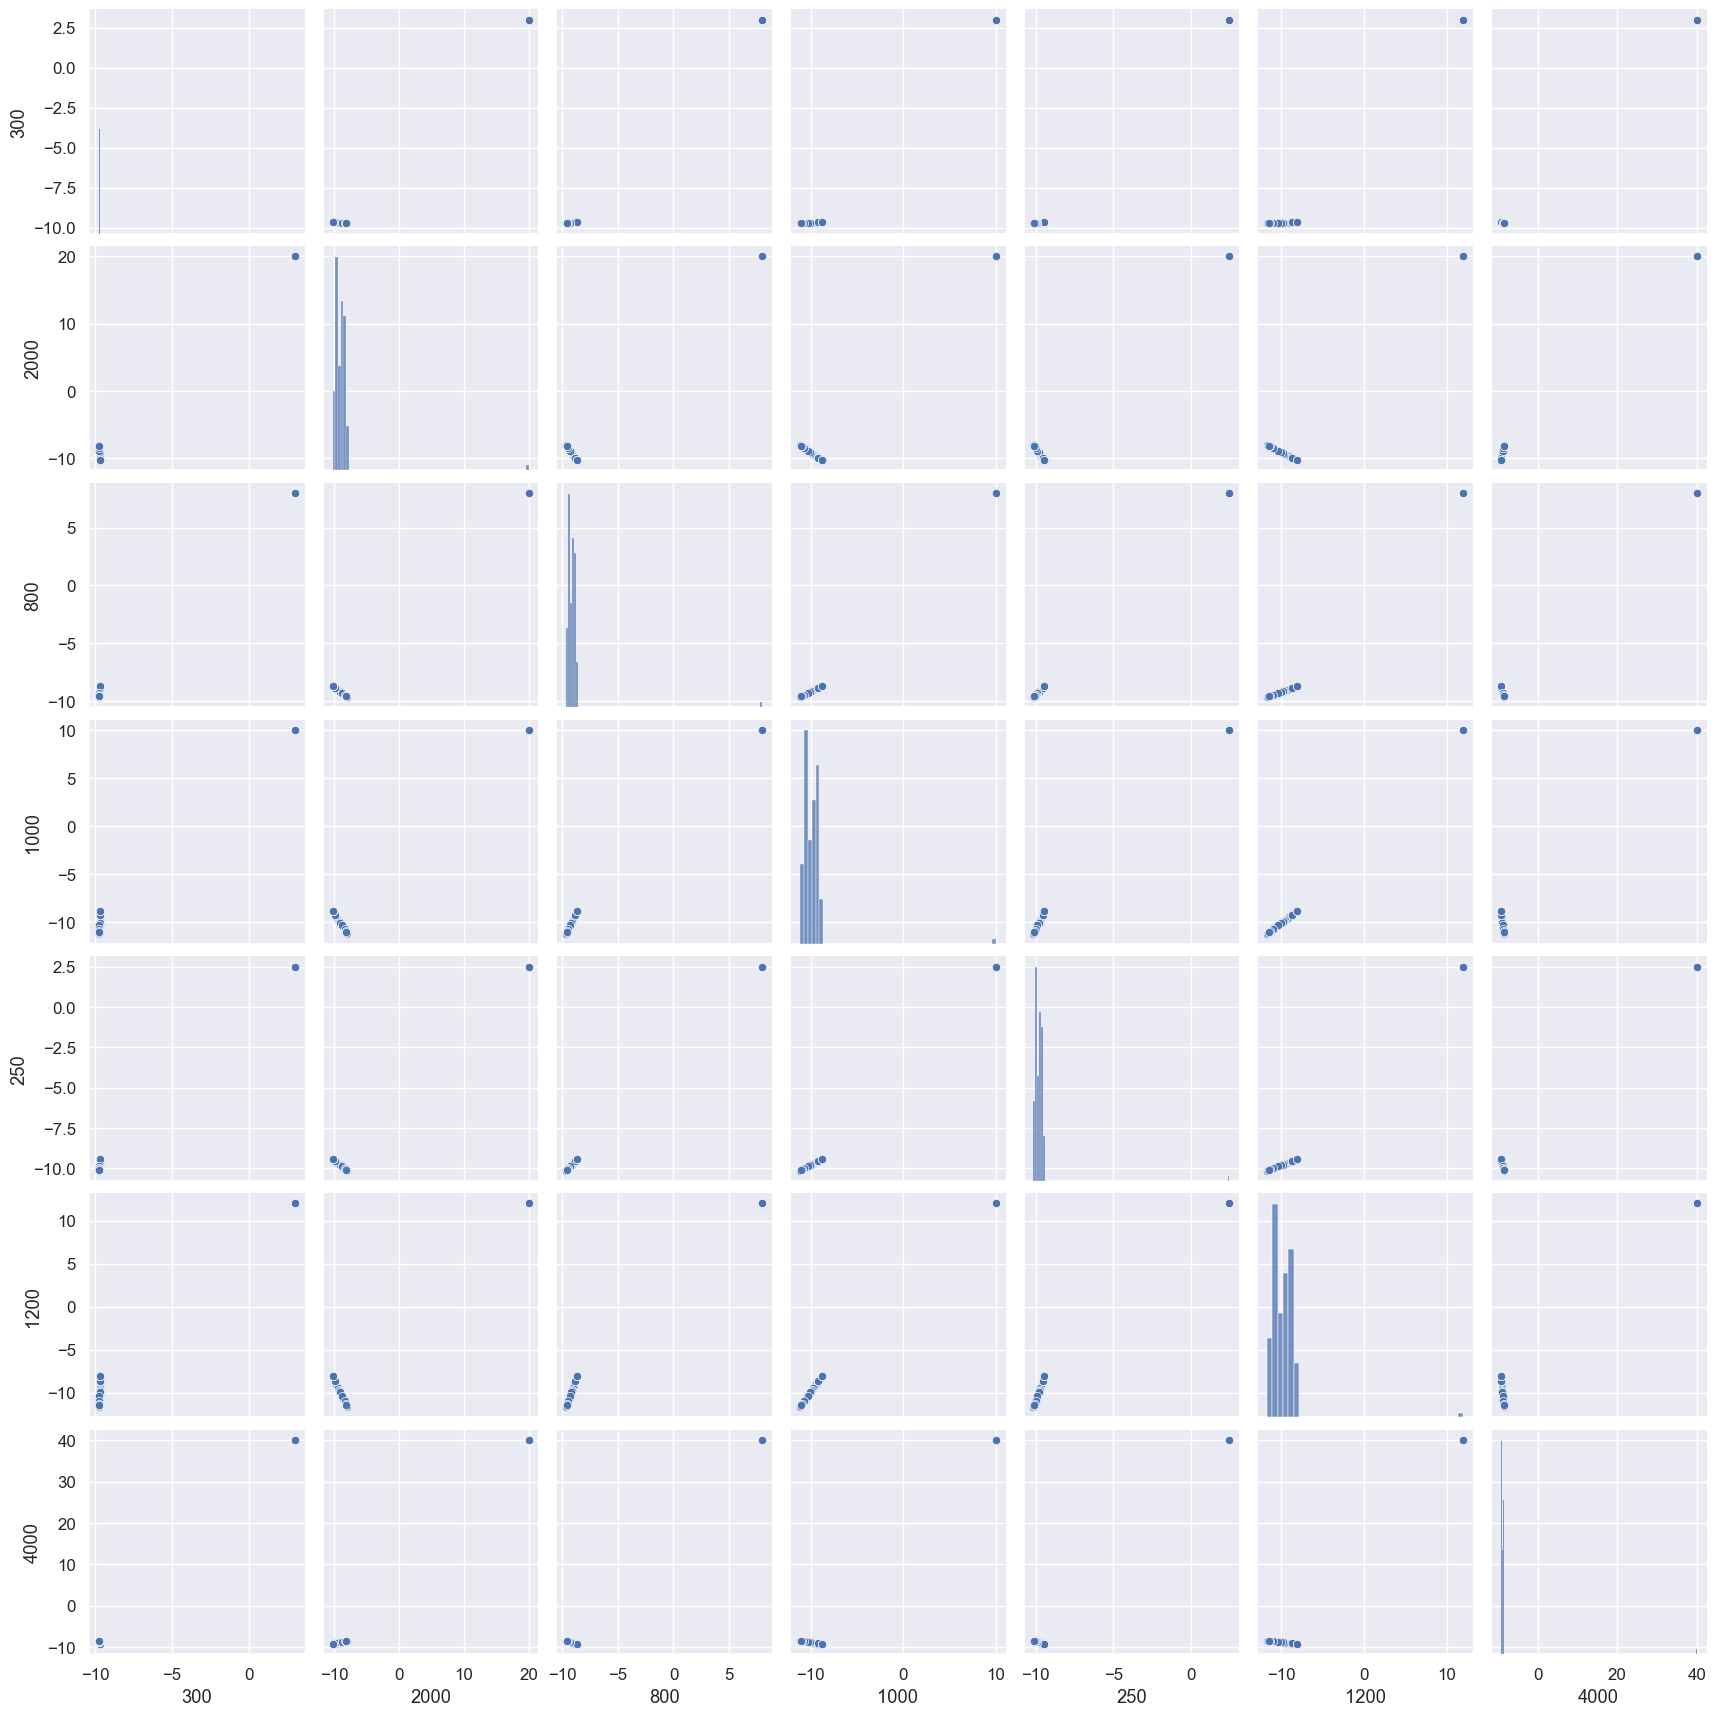

In [132]:
sns.pairplot(acc_name)

In [124]:
acc_name.describe()

,300,2000,8000,10000,250,12000,40000
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,-0.000024,0.786747,-0.800614,-2.249932,0.000591,-0.073202,0.972109
std,0.000020,0.393154,0.244821,1.957284,0.000134,1.530645,0.253300
min,-0.000060,0.061880,-1.252000,-5.858700,0.000340,-2.895300,0.505090
25%,-0.000040,0.433938,-1.020300,-4.006400,0.000470,-1.446800,0.744803
50%,-0.000020,0.786740,-0.800600,-2.249900,0.000590,-0.073205,0.972110
75%,-0.000010,1.139547,-0.580900,-0.493500,0.000710,1.300380,1.199410
max,0.000010,1.511630,-0.349200,1.358790,0.000840,2.748910,1.439130


In [125]:
acc_name

,300,2000,8000,10000,250,12000,40000
S47,-0.00001,0.59428,-0.9205,-1.2919,0.00066,-0.82240,0.84811
S47_Copy_1,-0.00003,0.97916,-0.6808,-3.2080,0.00053,0.67601,1.09609
S48,-0.00001,0.59427,-0.9205,-1.2919,0.00066,-0.82250,0.84811
S48_Copy_1,-0.00003,0.97916,-0.6808,-3.2080,0.00053,0.67601,1.09609
S49_Copy_1,-0.00003,0.97915,-0.6808,-3.2080,0.00053,0.67601,1.09608
...,...,...,...,...,...,...,...
S56_Copy_1,-0.00003,1.01124,-0.6608,-3.3677,0.00051,0.80089,1.11675
S46_Copy_1,-0.00003,0.97917,-0.6808,-3.2080,0.00053,0.67602,1.09609
S19_Copy_1,-0.00005,1.23579,-0.5210,-4.4854,0.00044,1.67500,1.26141
S3_Copy_1,-0.00005,1.36410,-0.4411,-5.1241,0.00040,2.17450,1.34407


# Sparse Sensing 

In [ ]:
#ver o funcionamento do flatten e reshape 
#deve manter numero de linhas e counas


df_FR = arr.reshape(arr.shape[0]*arr.shape[1],arr.shape[2])

In [ ]:
df_FR.shape

In [ ]:
df_FR

In [ ]:
from numpy import linalg as LA
A_AT = np.matmul(A, AT)
autoval, autovec = LA.eig(A_AT) 
print('Autovalor:', autoval)
print('Autovetor:', autovec)

In [ ]:
from scipy.linalg import svd
 
"""
Singular Value Decomposition
"""
# define a matrix
X = np.array([[0, 0, 0], [0,0,-2]])
print(X)
# perform SVD
U, s, V_transpose = svd(X)
# print different components
print("U: ",U)
print("Singular array",s)
print("V^{T}",V_transpose)